# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# For reading and working with data
import numpy as np
import pandas as pd

# For data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For capitalizing strings in reports
import string

# Import warnings to ignore the warnings
import warnings
warnings.filterwarnings('ignore')


# For splitting the data into training and test sets
from sklearn.model_selection import train_test_split

# To get different metric scores
from sklearn import metrics

# Import GridSearchCV module
from sklearn.model_selection import GridSearchCV
    
# To develop models
from sklearn.tree import DecisionTreeClassifier

# For ensemble models
from sklearn.ensemble import (
    BaggingClassifier, RandomForestClassifier,
    AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
)

# For develop XGBoost models
from xgboost import XGBClassifier

In [2]:
# Load the CSV file
def csv_read(file):
    """ 

    """
    # Read the first 20 rows
    df_sample = pd.read_csv(file, nrows=20)
    dt = {}
    # Determine the datatypes of the columns from the sample data
    for col, dtyp in zip(df_sample.columns, df_sample.dtypes):
        dt[col] = dtyp
        
    # Load the entire main file using the datatypes determined in the sample load
    df_final = pd.read_csv(file, dtype=dt)
    return df_final

# Call the csv_read function to load the file
df_Visa = csv_read('EasyVisa.csv')

## Data Overview

- Observations
- Sanity checks

In [3]:
# Display yhe first first rows
df_Visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
# Disply the last 5 rows
df_Visa.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Observations:
 * The case_id field appears to be sequential and not needed in building a model. The attribute can be removed.
 * Continent could be turned into dummy columns later
 * Education_of_employee could be turned into an ordinal number
 * Region_of_-employment could be turn into a dummy columns
 * The predictor case_status is 'Denied' and 'Certified'

In [6]:
# Show the number of rows and columns of the dataframe
print('There are {} rows and {} columns'.format(df_Visa.shape[0], df_Visa.shape[1]))

There are 25480 rows and 12 columns


In [7]:
# List the column datatypes and check to see if there are any null values in the dataframe
df_Visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Observations:
 * The case_id, continent, education_of_employee, has_job_experience, requires_job_training, region_of_employment,
   unit_of_wage, full_time_position, and case_status are all objects
 * The no_of_employees, yr_of_estab are integers
 * The prevailing_wage is a float data type
 * There are no missing values present at this time

In [8]:
# Provide information on attributes
# Show name, number of missing values, unique value count, and unique value list if count less than 20
for i in df_Visa.columns:
    print('Attribute: {}'.format(i))
    print('Number of missing values: {}'.format(sum(df_Visa[i].isna())))
    print('Unique values: {}'.format(df_Visa[i].nunique()))
    if df_Visa[i].nunique() < 20:
        print('Value list:')
        df_unique=df_Visa[i].unique()
        print(np.sort(df_unique))
    else:
        print('Too many unique values to list')
    print('-'*100)

Attribute: case_id
Number of missing values: 0
Unique values: 25480
Too many unique values to list
----------------------------------------------------------------------------------------------------
Attribute: continent
Number of missing values: 0
Unique values: 6
Value list:
['Africa' 'Asia' 'Europe' 'North America' 'Oceania' 'South America']
----------------------------------------------------------------------------------------------------
Attribute: education_of_employee
Number of missing values: 0
Unique values: 4
Value list:
["Bachelor's" 'Doctorate' 'High School' "Master's"]
----------------------------------------------------------------------------------------------------
Attribute: has_job_experience
Number of missing values: 0
Unique values: 2
Value list:
['N' 'Y']
----------------------------------------------------------------------------------------------------
Attribute: requires_job_training
Number of missing values: 0
Unique values: 2
Value list:
['N' 'Y']
-----------

#### Observations:
 * There are zero rows with missing values in the dataset
 * The case_id is a unique required field and can be removed
 * Continent has 6 unique values including Oceania
 * Education_of_employee has 4 unique values
 * Has_job_experience, requires_job_training, and full_time_position are Y/N fields
 * No_employees has 7105 unique values
 * Yr_of_estab has 199 unique values indicating there are some companies that have existed more than 100 years
 * Region of employment has 5 unique values including 'Island'
 * Prevailing_Wage has 25454 unique values
 * Unit_of_wage has 4 unique values
 * The predictor field has the values 'Certified' and 'Denied'

In [9]:
# Check the dataframe for duplicate records
df_Visa.duplicated().sum()

0

#### Observations:
 * The are zero duplicate records

In [10]:
# Describe the numerical attributes
df_Visa.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Observations: 
 * No_of_employees have a negative value for the minimum number (-26) that needs to be investigated
 * 75% of companies have 3504 or less no_of_employees. There appears to be at least 1 outlier with 602069 employees
 * The earliest company was founded in 1800. The median establishment year is 1997
 * The prevailing_wage values range from 2.1367 to 319210.27. These wages have various types (hour, week, month, year) and
   probably should be standardized for ease of understanding

## Exploratory Data Analysis (EDA)

In [11]:
# Define function to create a histogram and box plot for an attribute
def hist_box_plots(df, col):
    """
    Create a histogram and bookplot of the column and dataframe provided
    
    df: dataframe
    col: dataframe column
    """
    
    # Create the plot figure
    plt.figure(figsize=(12,3))
    
    ################################################
    
    # Creating first subplot
    plt.subplot(1,2,1) 
    
    # Add title and labels
    plt.title(string.capwords(col.replace('_',' ')), fontsize=12, pad=20, loc='left')        
    plt.xlabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=5)
    plt.ylabel('Record Count', fontsize=10, labelpad=10)
    
    # Set tick font sizes
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    
    # Create a histogram of the attribute
    ax = sns.histplot(data = df, x=col, color='#CCECFF')
    
    # Hide the top and left spines of the histogram
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add a mean to the histogram
    ax.axvline(df[col].mean(), color='green', linestyle='--')
    
    # Add median to the histogram
    ax.axvline(df[col].median(), color='red', linestyle='-')
        
    ################################################    
    
    # Create second box plot next to first boxplot
    plt.subplot(1,2,2)
                
    # Set the flier type, color, and size of the outliers            
    flierprops = dict(marker='o', markerfacecolor='Red', markersize='9')
                
    # Add an x-axis label            
    plt.xlabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=5,)
                
    # Set the tick font size            
    plt.xticks(fontsize=10)
                
    # Create a boxplot of the attribute            
    ax = sns.boxplot(data = df, x=col, showmeans=True, flierprops=flierprops, color='#CCECFF')
                
    # Hide the top, right, and left spines            
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Show the plot
    plt.show()
    
    # Print and line after the graphs to delineate between multiple calls
    print('_'*122)

In [12]:
# Define function to create a bar plot for an attribute and a possible column value for another attribute
def bar_plots(data, col, subset=None):
    """
    Create a bar plot of the column and dataframe provided
    
    data: dataframe
    col: dataframe column
    subset: a categorical value from a column
    """
    
    # For each value in the list of categories, create a bar chart
    
    # If there are less than 8 unique values in the attribute, set the size to 4 by 3
    # else set the size to 9 by 3 to show all values cleaner
    if data[col].nunique() < 8:
        plt.figure(figsize=(8,3))
    else: 
        plt.figure(figsize=(9,3))
    
    # Create the bar plot of the dataframe and all attributes individually
    # Order the each subplot by the x-axis data xtick names
    ax = sns.countplot(data=data,
                       x=col,
                       color='#CCECFF',
                       linewidth=.5, edgecolor='black',
                       order = data[col].value_counts().index.sort_values())
    
    # Add title and labels   
    if subset==None:
        plt.title(string.capwords(col.replace('_',' ')), fontsize=12, pad=10, loc='left')
    else:
        plt.title(string.capwords(col.replace('_',' '))+
                  ' and ' +subset, 
                  fontsize=12, pad=10, loc='left')   
    plt.xlabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=5,)
    plt.ylabel('Record Count', fontsize=10, labelpad=5)

    # If there is less than 20 unique values for the attribute, do not rotate the x-tick label
    # else rotate the x-tick label by 90 degrees for readability
    total = len(data[col])  # length of the column

    # Add percentage labels for each bar
    for p in ax.patches:
        label= '{:.1f}%'.format(p.get_height()/total*100) # include the bar value
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        ax.annotate(
                label,
                (x, y),
                ha="center",
                va="center",
                size=8,
                xytext=(0, 5),
                textcoords="offset points",
                )  # annotate the percentage
    
    # Set the xtick parameters
    if data[col].nunique() < 20:
        plt.xticks(rotation=0, fontsize=8) 
    else:
        plt.xticks(rotation=90, fontsize=6)               
    plt.yticks(fontsize=8)
    
    # Tighten the layout of the subplots
    plt.tight_layout()    
    
    # Hide the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Show the plot
    plt.show()
    
    # Print and line after the graphs to delineate between multiple calls
    print('_'*122)

### Univariate Analysis

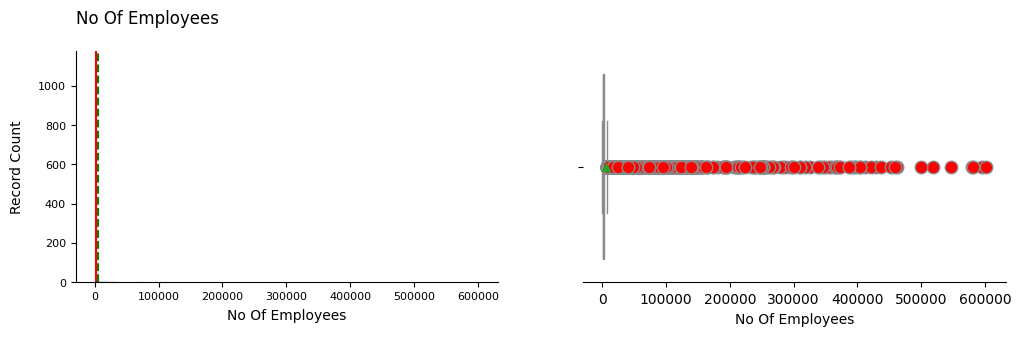

__________________________________________________________________________________________________________________________


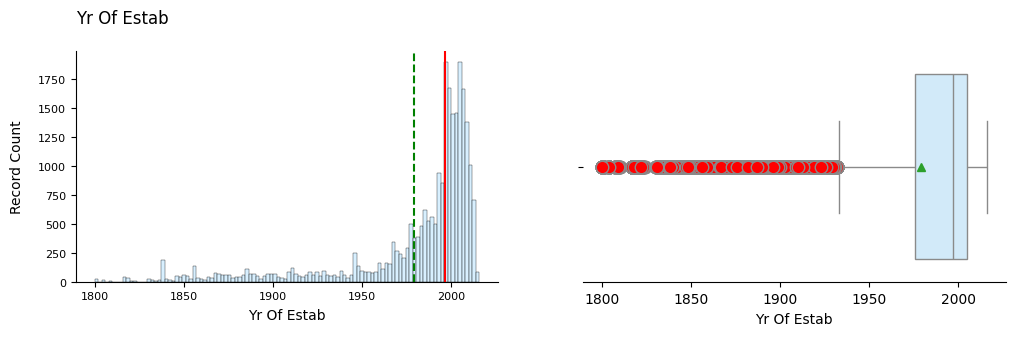

__________________________________________________________________________________________________________________________


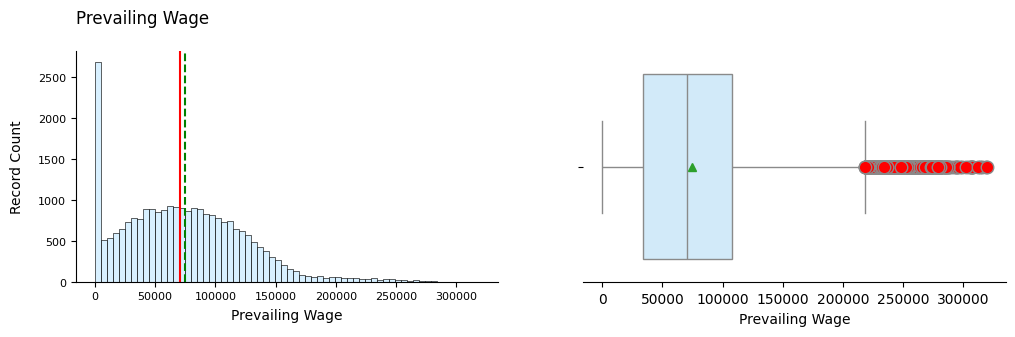

__________________________________________________________________________________________________________________________


In [13]:
# Create histograms and box plots for numerical attributes with many values 

# Create a list of the numerical attributes
df_num_list = [df_Visa.columns[x] for x in range(len(df_Visa.columns)) 
               if df_Visa.dtypes[x] in ('float64', 'int64')]

# Call the hist_box_plot function for each item in the list that has more than 31 values
# 31 was picked due to maximum calendar days in a month
for col in df_num_list:
    if df_Visa[col].nunique() >= 32:
        hist_box_plots(df_Visa, col)   

#### Observations:
 * No_of_employees is heaviliy right skewed. The median is ~2000 employees with many companies over 100k employees
 * Yr_of_estab is left skewed. While there are old companies from the 1800-1970s, most companies are more recently
   established
 * The prevailing_wage has a large number of records with low wage which could be the hourly employees. Over half of the
   records are over 50k indicating that a majority of the records are for probably yearly wages

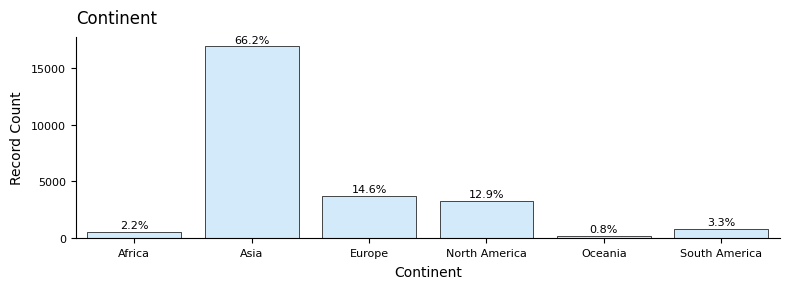

__________________________________________________________________________________________________________________________


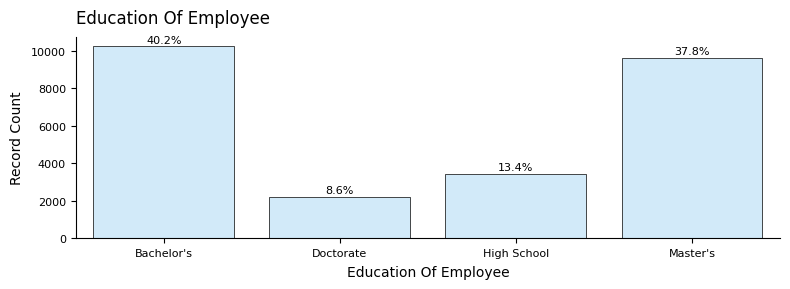

__________________________________________________________________________________________________________________________


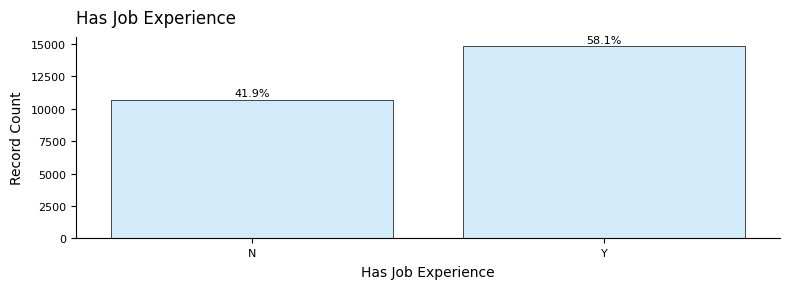

__________________________________________________________________________________________________________________________


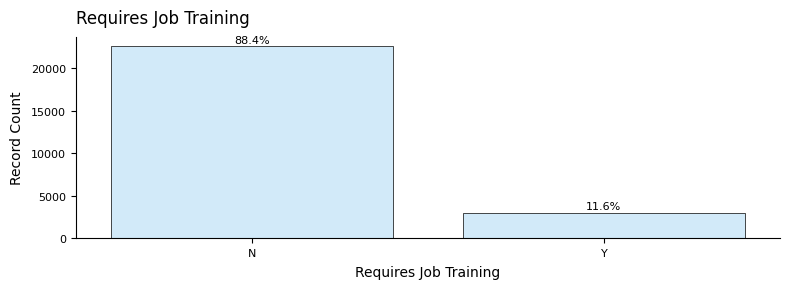

__________________________________________________________________________________________________________________________


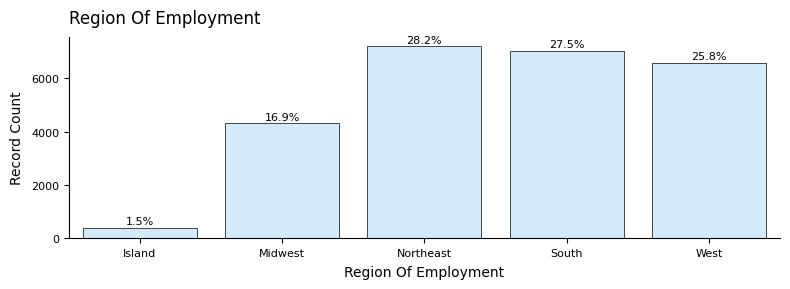

__________________________________________________________________________________________________________________________


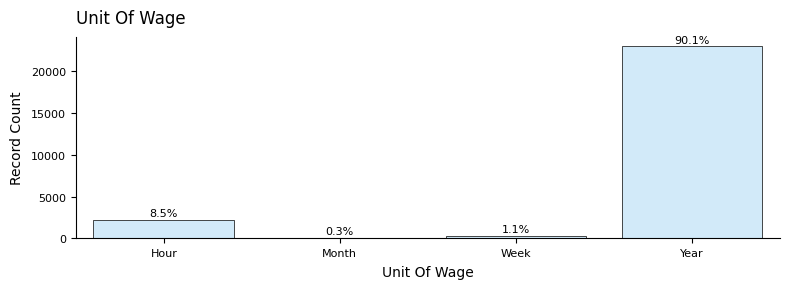

__________________________________________________________________________________________________________________________


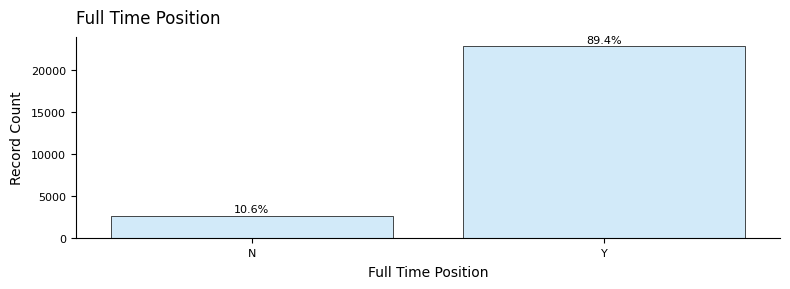

__________________________________________________________________________________________________________________________


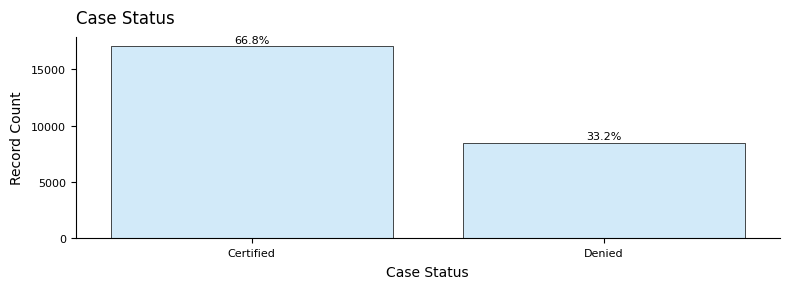

__________________________________________________________________________________________________________________________


In [14]:
# Create bar plots for other attributes
                  
# Create a list of the attributes
df_cat_list = df_Visa.columns.tolist()                

# Call the bar_plot function for each item in the list
for col in df_cat_list:
    if df_Visa[col].nunique() <= 32:
        bar_plots(df_Visa, col)   

#### Observations:
 * Two-thirds of the employees are from Asia
 * Only 13% of employees have a high school degree
 * 58% of employees had job experience
 * 88% of jobs did not require job training
 * Very few employees are employed in the island region.
 * 90% of wages are of the yearly designation. About 8% are of the hourly wage which follows the low values in the 
   prevailing wage amount

### Bivariate Analysis

In [15]:
# Create a heatmap of the correlation of the numerical attributes
def heatmap_plt(data):
    
    # Create labels for the heatmap x and y labels
    labels = []
    df_num_list = [data.columns[x] for x in range(len(data.columns)) 
               if data.dtypes[x] in ('float64', 'int64')]
    for i in df_num_list:
        x = i.replace('_',' ').split()
        labels.append(' '.join(word[:].capitalize() for word in x))

    # Correlate the numerical attributes    
    df_corr = data[df_num_list].corr()

    plt.figure(figsize=(8,8))

    # Create the heatmap
    ax = sns.heatmap(df_corr, cbar=True, annot=True, vmin=-1, vmax=1, fmt=".2f",
                     xticklabels=labels,
                     yticklabels=labels,
                     cmap='Blues'
                    )

    # Add title
    plt.title('Heatmap: Numerical Attributes')

    # Show plot
    plt.show()

In [16]:
# Create density plot for one category and one numeric column
def distplot_by_cat_and_num_att (data, att, col):
    """
    Create bivariate box plots for one categorical attribute and one numerical attribute
    
    data: dataframe
    att: categorical attribute
    col: numerical attribute
    """
    # Create the plot figure
    plt.figure(figsize=(12,3))
    
    ################################################

    # Target must have 2 valuess
    target_uniq = data[att].unique()
    
    # Creating first density subplot
    plt.subplot(1,2,1)  
    plt.title("Distribution of target for target=" + string.capwords(target_uniq[0].replace('_',' ')))
    ax = sns.histplot(
            data=data[data[att] == target_uniq[0]],
            x=col,
            kde=True,
            color="teal",
            stat='density')

    plt.xlabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=5)
    #ax.set_xlabel('tset')#(string.capwords(target_uniq[0].replace('_',' ')), fontsize=10, labelpad=5)
    
    # Create second density subplot
    plt.subplot(1,2,2)
    plt.xlabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=5)
    plt.title("Distribution of target for target=" + string.capwords(target_uniq[1].replace('_',' ')))
    sns.histplot(
        data=data[data[att] == target_uniq[1]],
        x=col,
        kde=True,
        color="orange",
        stat='density')

In [17]:
# Create bivariate box plot for one categorical attribute and one numerical attribute
# A subset categorical value of another attribute can be added
def boxplot_by_cat_and_num_att(data, att, col, subset=None):
    """
    Create bivariate box plots for one categorical attribute and one numerical attributes
    
    data: dataframe
    att: categorical attribute
    col: numerical column
    subset: a categorical value from a column
    """
    
    # Create the box plot figure
    plt.figure(figsize=(14,4))
    
    # Set the flier type, color, and size of the outliers 
    flierprops = dict(marker='o', markerfacecolor='Red', markersize='9')
    
    # Create a boxplot of the attribute  
    ax = sns.boxplot(data=data, x=att, y=col,
                     showmeans=True,
                     flierprops=flierprops,
                     color='#CCECFF',
                     order = data[att].value_counts().index.sort_values()
                     )
    
    # Add title and labels
    if subset==None:
        plt.title(string.capwords(col.replace('_',' '))+
                  ' by ' +string.capwords(att.replace('_',' ')), 
                  fontsize=12, pad=10)
    else:
        plt.title(string.capwords(col.replace('_',' '))+
                  ' by ' +string.capwords(att.replace('_',' '))+
                  ' and ' +subset, 
                  fontsize=12, pad=10)
    plt.xlabel(string.capwords(att.replace('_',' ')), fontsize=10, labelpad=5)
    plt.ylabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=5)
    
    # If there is less than 20 unique values for the attribute, do not rotate the x-tick label
    # else rotate the x-tick label by 90 degrees for readability
    if data[att].nunique() < 20:
        plt.xticks(rotation=0, fontsize=8) 
    else:
        plt.xticks(rotation=90, fontsize=8)               
    
    # Show the plot
    plt.show()

In [18]:
# Define function to create a normalized stacked bar plot of an attribute against another column
def stacked_barplot(data, att, col):
    """
    Create bivariate box plots for one categorical attribute and one numerical attributes
    
    data: dataframe
    att: categorical attribute
    col: numerical column
    """    
    
    # Count the unique values in the col column
    count = data[col].nunique()
    
    # Return the first value in the sorted att column
    sorter = data[att].value_counts().index[-1]
    
    # Create a crosstab of the col and att columns
    tab1 = pd.crosstab(data[col], data[att], margins=True).sort_values(
        by=sorter, ascending=False)   
    
    tab1['Pct_Denied']=round(tab1['Denied']/tab1['All']*100,2)
    
    # Print the crosstab summary
    print('Crosstab of {} and {}'.format(string.capwords(att.replace('_',' ')), 
                                         string.capwords(col.replace('_',' '))))
    print('_'*80)
    print(tab1)
    
    ######################################################
    
    # Create the plot figure
    plt.figsize=(2,1)
    
    # Create a normalized crosstab of the col and att columns
    tab = pd.crosstab(data[col], data[att], normalize="index").sort_values(
        by=col, ascending=True)
    
    # Create a bar plot of the crosstab data
    ax = tab.plot(kind="bar", stacked=True)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), frameon=False,)
    
    # Add title and labels
    plt.title('{} Against {}'.format(string.capwords(att.replace('_',' ')), 
                                     string.capwords(col.replace('_',' '))),
                                     fontsize=12, pad=10, loc='left')  
    labels = [string.capwords(item.get_text().replace('_',' ')) for item in ax.get_xticklabels()]
    ax.set_xticklabels(labels)       
    plt.xlabel(string.capwords(col.replace('_',' ')), fontsize=10, labelpad=10)
 
    # Hide the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Show the plot
    plt.show()

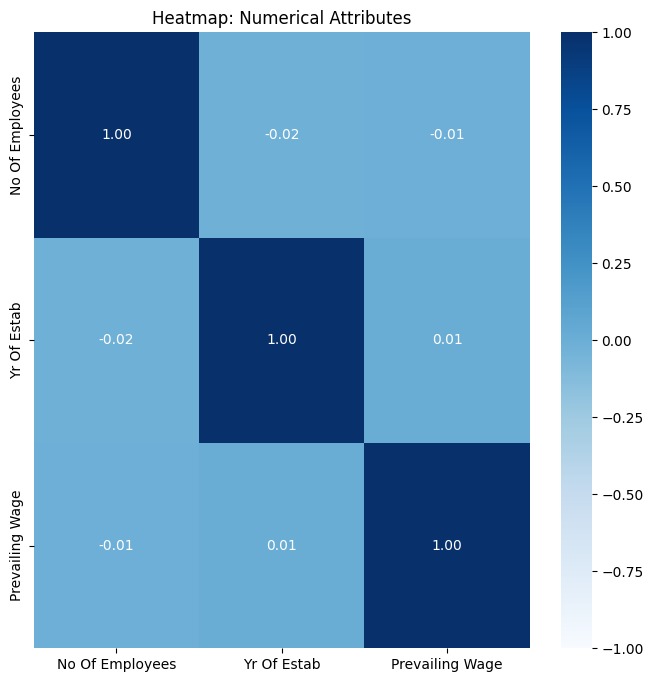

In [19]:
# Create a heatmap of the correlation of the numerical attributes
heatmap_plt(df_Visa)

#### Observations:
 * There appears to be no correlation betwen the no_of_employees, yr_of_estab, and prevailing_wage

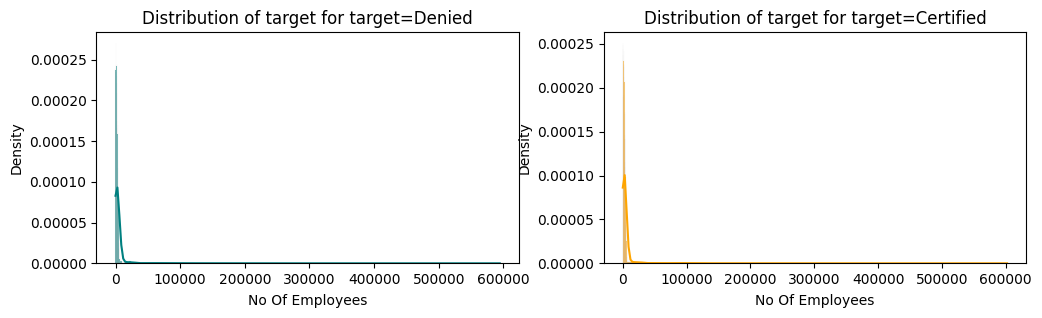

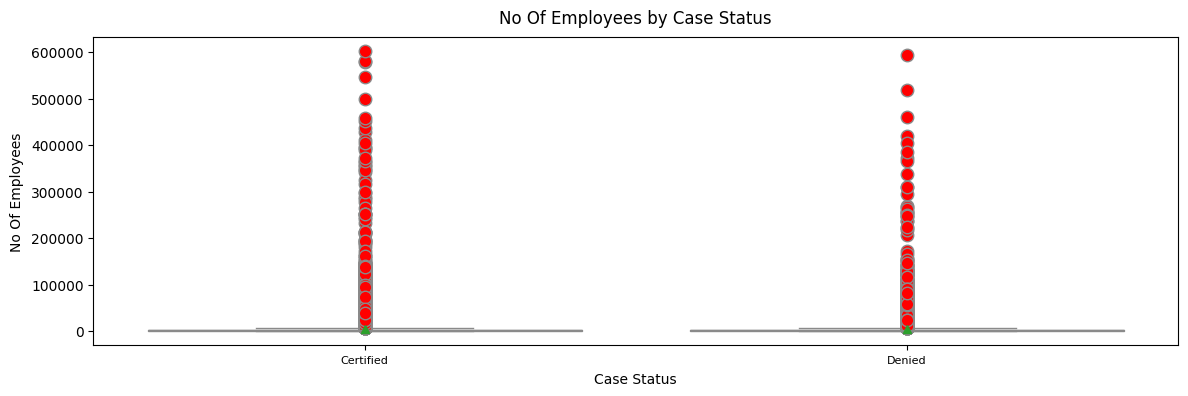

________________________________________________________________________________________________________________________


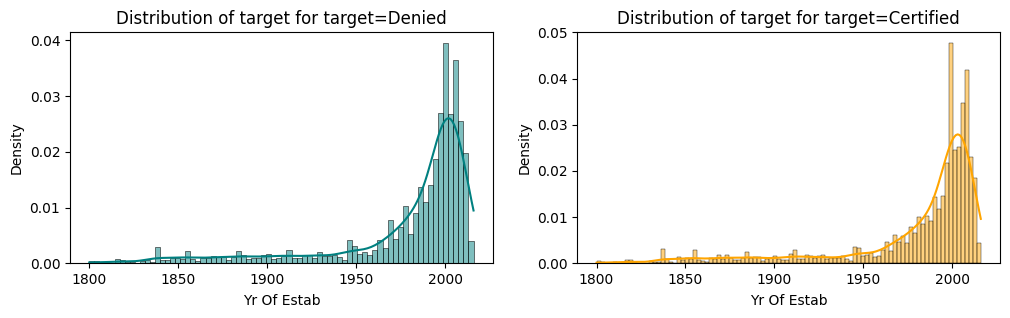

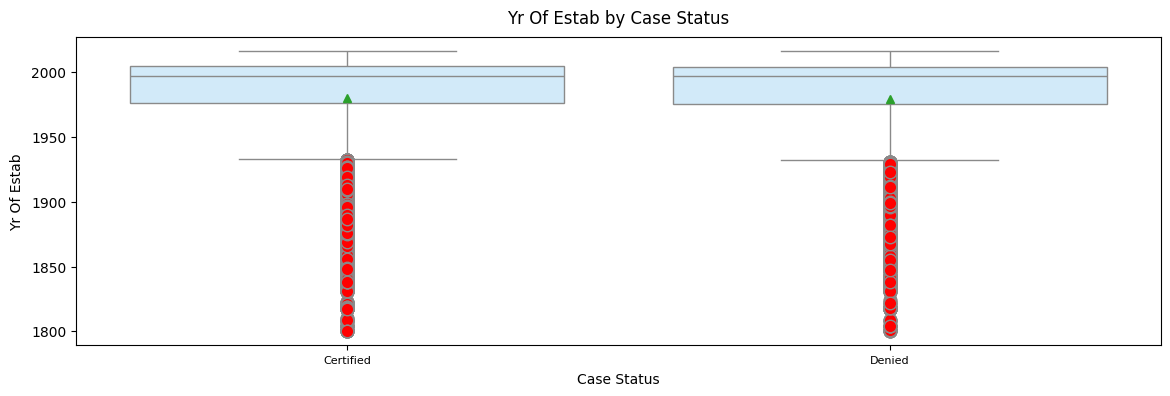

________________________________________________________________________________________________________________________


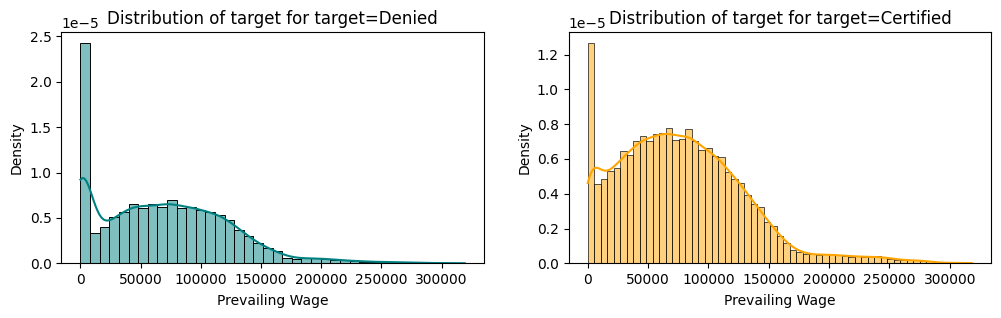

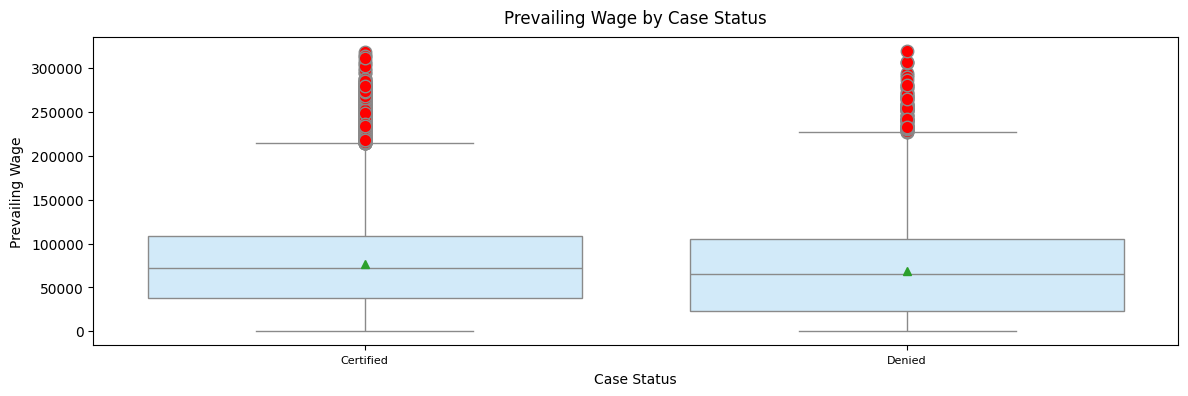

________________________________________________________________________________________________________________________


In [20]:
# Create distribution plots and box plots for the listed numerical attributes by case_status
df_list = ['no_of_employees','yr_of_estab','prevailing_wage']
for col in df_list:
    distplot_by_cat_and_num_att(df_Visa, 'case_status', col)  
    boxplot_by_cat_and_num_att(df_Visa, 'case_status', col)  
    print('_'*120)

#### Observations:
 * There does not appear to be any impact on whether the number of employees impacts the case status
 * There does not appear to be any impact on whether a company's established year impacts the case status
 * There appears to be an impact on whether the prevailing wage impacts the case status

Crosstab of Case Status and Continent
________________________________________________________________________________
case_status    Certified  Denied    All  Pct_Denied
continent                                          
All                17018    8462  25480       33.21
Asia               11012    5849  16861       34.69
North America       2037    1255   3292       38.12
Europe              2957     775   3732       20.77
South America        493     359    852       42.14
Africa               397     154    551       27.95
Oceania              122      70    192       36.46


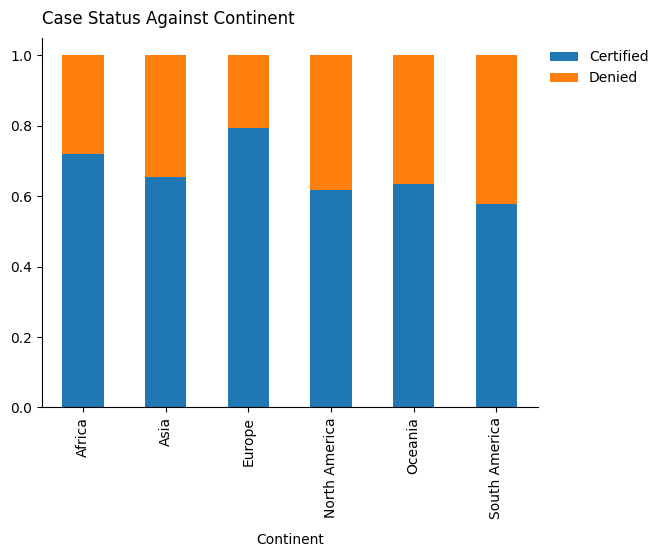

________________________________________________________________________________________________________________________ 

Crosstab of Case Status and Education Of Employee
________________________________________________________________________________
case_status            Certified  Denied    All  Pct_Denied
education_of_employee                                      
All                        17018    8462  25480       33.21
Bachelor's                  6367    3867  10234       37.79
High School                 1164    2256   3420       65.96
Master's                    7575    2059   9634       21.37
Doctorate                   1912     280   2192       12.77


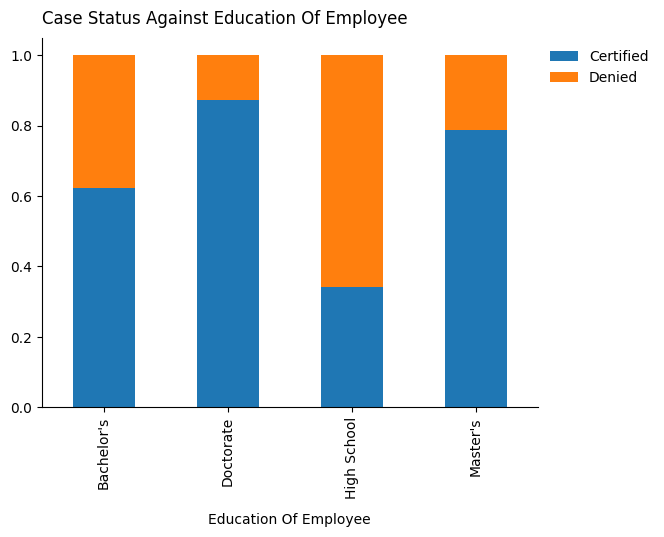

________________________________________________________________________________________________________________________ 

Crosstab of Case Status and Has Job Experience
________________________________________________________________________________
case_status         Certified  Denied    All  Pct_Denied
has_job_experience                                      
All                     17018    8462  25480       33.21
N                        5994    4684  10678       43.87
Y                       11024    3778  14802       25.52


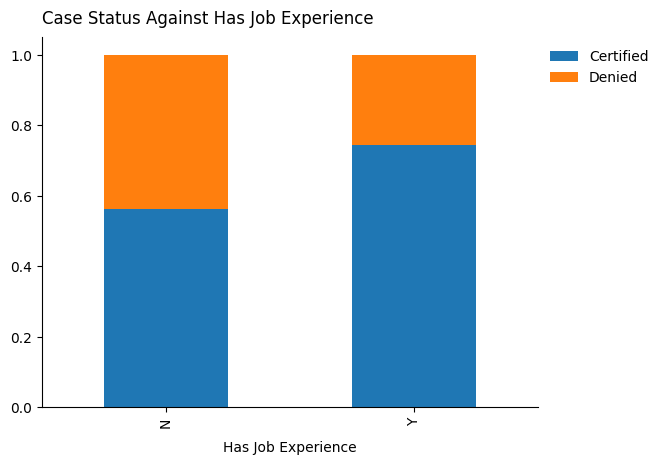

________________________________________________________________________________________________________________________ 

Crosstab of Case Status and Requires Job Training
________________________________________________________________________________
case_status            Certified  Denied    All  Pct_Denied
requires_job_training                                      
All                        17018    8462  25480       33.21
N                          15012    7513  22525       33.35
Y                           2006     949   2955       32.12


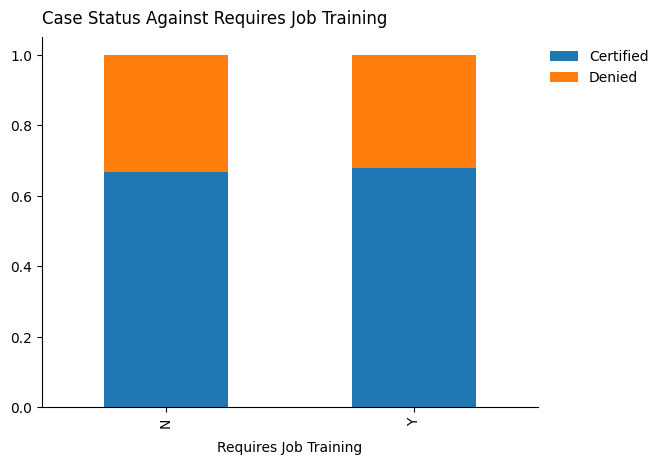

________________________________________________________________________________________________________________________ 

Crosstab of Case Status and Region Of Employment
________________________________________________________________________________
case_status           Certified  Denied    All  Pct_Denied
region_of_employment                                      
All                       17018    8462  25480       33.21
Northeast                  4526    2669   7195       37.10
West                       4100    2486   6586       37.75
South                      4913    2104   7017       29.98
Midwest                    3253    1054   4307       24.47
Island                      226     149    375       39.73


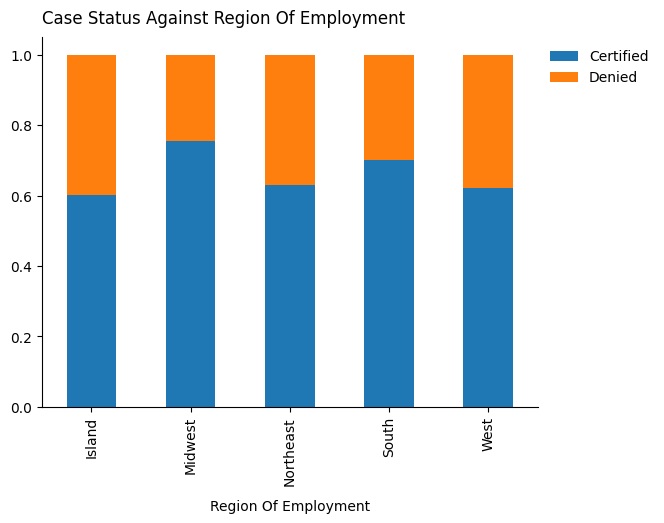

________________________________________________________________________________________________________________________ 

Crosstab of Case Status and Unit Of Wage
________________________________________________________________________________
case_status   Certified  Denied    All  Pct_Denied
unit_of_wage                                      
All               17018    8462  25480       33.21
Year              16047    6915  22962       30.11
Hour                747    1410   2157       65.37
Week                169     103    272       37.87
Month                55      34     89       38.20


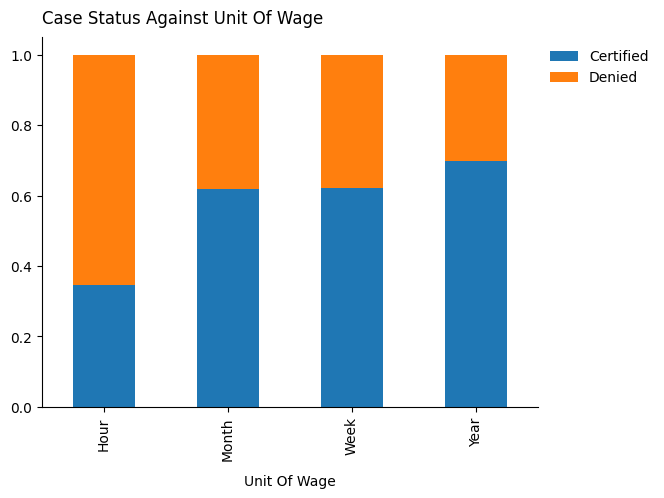

________________________________________________________________________________________________________________________ 

Crosstab of Case Status and Full Time Position
________________________________________________________________________________
case_status         Certified  Denied    All  Pct_Denied
full_time_position                                      
All                     17018    8462  25480       33.21
Y                       15163    7610  22773       33.42
N                        1855     852   2707       31.47


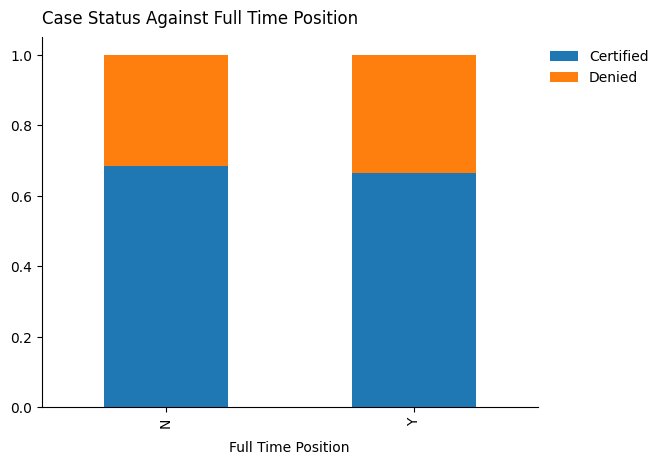

________________________________________________________________________________________________________________________ 



In [21]:
# Create stacked bar plots for the listed categorical attributes
df_list = ['continent','education_of_employee','has_job_experience','requires_job_training',\
           'region_of_employment','unit_of_wage','full_time_position']
for col in df_list:
    stacked_barplot(df_Visa, 'case_status', col)
    print('_'*120,'\n')

#### Observations:
 * Europeans are certified more often vs other continents. South American peoples are denied more often vs other
   continents
 * Most employees (16861) are from  Asia. Very few employees are from South America (852), Africa (551), and Oceania (192) 
 * The more education an employee has, the more likely they are to become certified. Those with only a high school diploma 
   have a very low level of certification (<40%)
 * Employees with job experience have a higher percentage of certification than those without job experience
 * Requiring job training appears to have no impact on whether a case is certified or denied. There were very few jobs
   requiring training (2955)
 * People working in the Midwest have a higher percentage of certifications than other regions. Very few people were 
   working in the island region (375)
 * Hourly jobs have the lowest percentage of certification (<40%)
 * Whether a job is full time or not has little impact on whether a case is certified or denied. There were very few jobs
   that were not full time (2707)

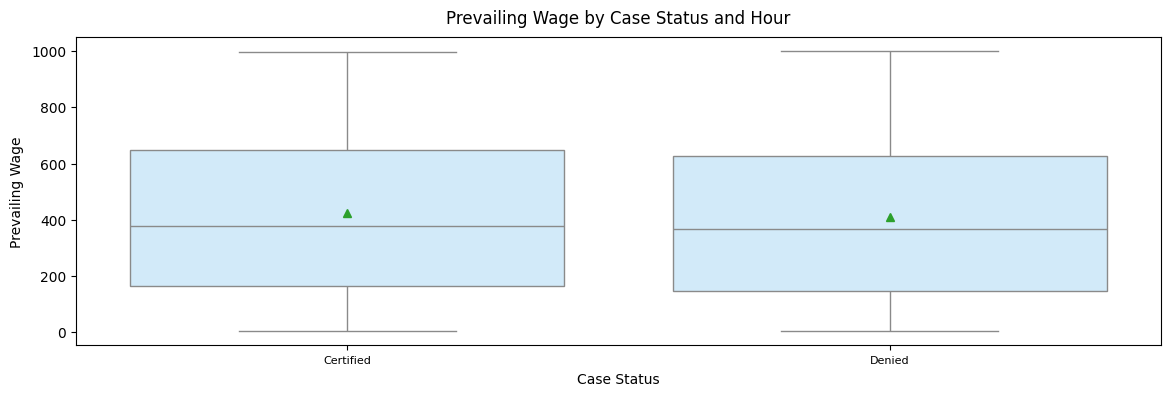

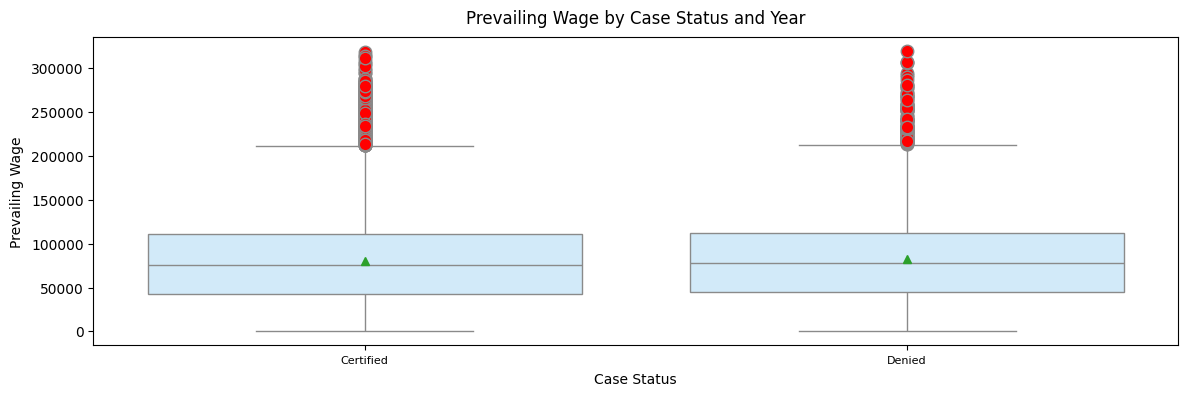

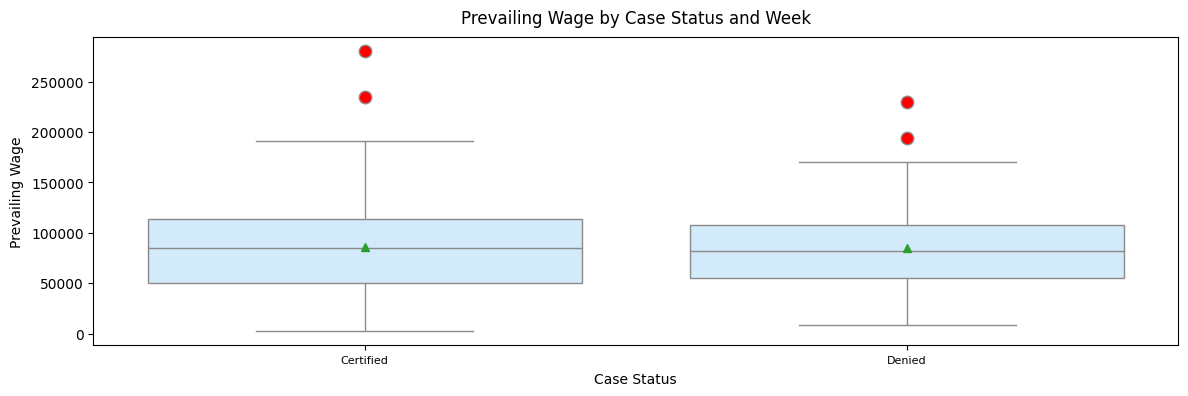

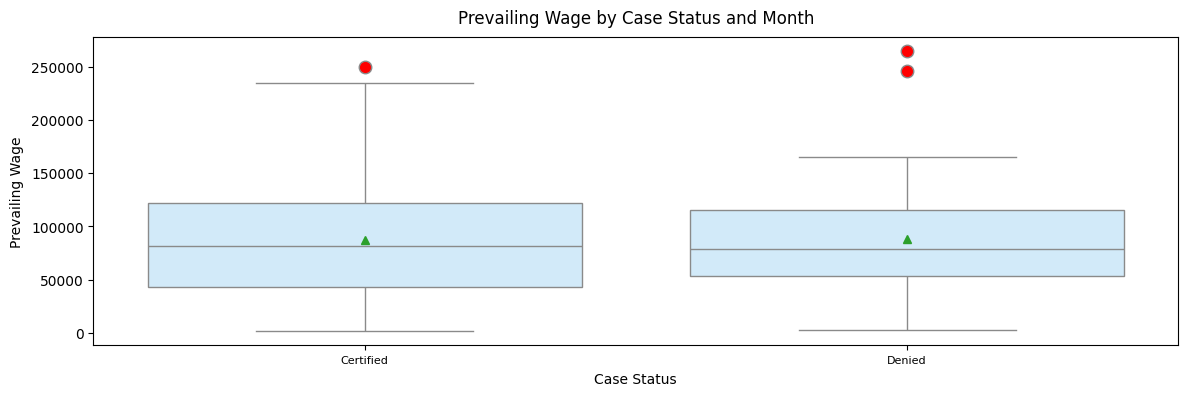

In [22]:
df_list = df_Visa['unit_of_wage'].unique()
for col in df_list:
    boxplot_by_cat_and_num_att(df_Visa[df_Visa['unit_of_wage']==col], 
                               'case_status', 
                               'prevailing_wage', subset=col)

#### Observations:
 * There does not appear to be an impact when the case status is analyzed by the unit of wage and the prevailing wage

### Questions:

### 1) Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

Crosstab of Case Status and Education Of Employee
________________________________________________________________________________
case_status            Certified  Denied    All  Pct_Denied
education_of_employee                                      
All                        17018    8462  25480       33.21
Bachelor's                  6367    3867  10234       37.79
High School                 1164    2256   3420       65.96
Master's                    7575    2059   9634       21.37
Doctorate                   1912     280   2192       12.77


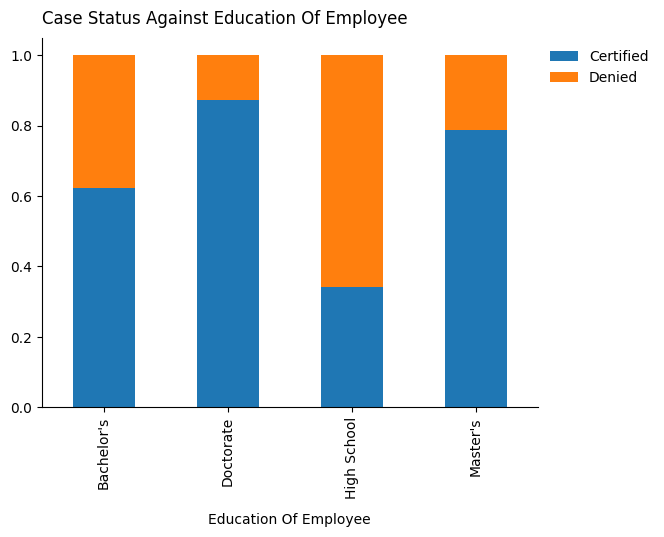

________________________________________________________________________________________________________________________ 



In [23]:
# Create stacked bar plots for the listed categorical attributes
df_list = ['education_of_employee']
for col in df_list:
    stacked_barplot(df_Visa, 'case_status', col)
    print('_'*120,'\n')

#### Observations:
 * The more education an employee has, the more likely they are to become certified. Those with only a high school diploma 
   have a very low level of certification (<40%)

### 2) How does the visa status vary across different continents?

Crosstab of Case Status and Continent
________________________________________________________________________________
case_status    Certified  Denied    All  Pct_Denied
continent                                          
All                17018    8462  25480       33.21
Asia               11012    5849  16861       34.69
North America       2037    1255   3292       38.12
Europe              2957     775   3732       20.77
South America        493     359    852       42.14
Africa               397     154    551       27.95
Oceania              122      70    192       36.46


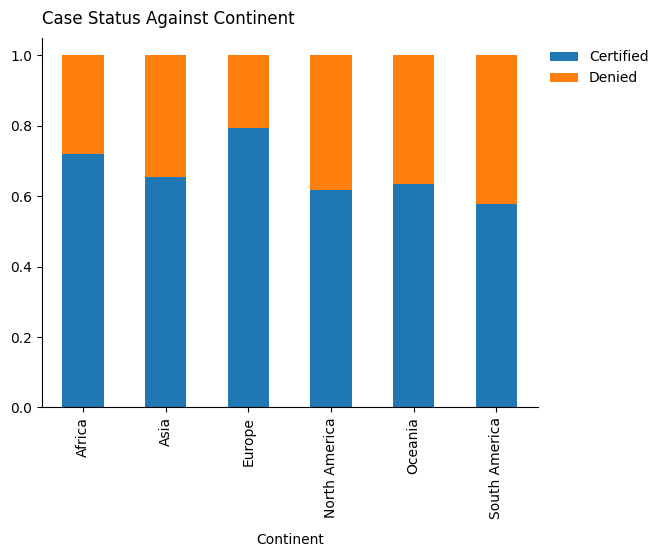

________________________________________________________________________________________________________________________ 



In [24]:
# Create stacked bar plots for the listed categorical attributes
df_list = ['continent']
for col in df_list:
    stacked_barplot(df_Visa, 'case_status', col)
    print('_'*120,'\n')

#### Observations:
 * Europeans are certified more often vs other continents. South American peoples are denied more often vs other
   continents
 * Most employees (16861) are from  Asia. Very few employees are from South America (852), Africa (551), and Oceania (192) 

### 3)  Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

Crosstab of Case Status and Has Job Experience
________________________________________________________________________________
case_status         Certified  Denied    All  Pct_Denied
has_job_experience                                      
All                     17018    8462  25480       33.21
N                        5994    4684  10678       43.87
Y                       11024    3778  14802       25.52


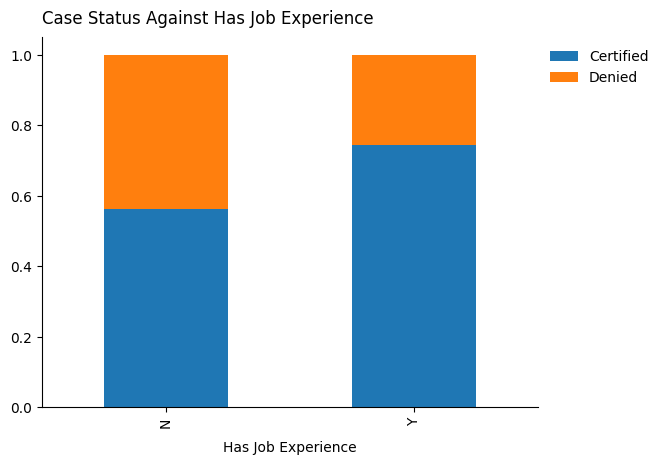

________________________________________________________________________________________________________________________ 



In [25]:
# Create stacked bar plots for the listed categorical attributes
df_list = ['has_job_experience']
for col in df_list:
    stacked_barplot(df_Visa, 'case_status', col)
    print('_'*120,'\n')

#### Observations:
 * Employees with job experience have a higher percentage of certification than those without job experience

### 4) In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

Crosstab of Case Status and Unit Of Wage
________________________________________________________________________________
case_status   Certified  Denied    All  Pct_Denied
unit_of_wage                                      
All               17018    8462  25480       33.21
Year              16047    6915  22962       30.11
Hour                747    1410   2157       65.37
Week                169     103    272       37.87
Month                55      34     89       38.20


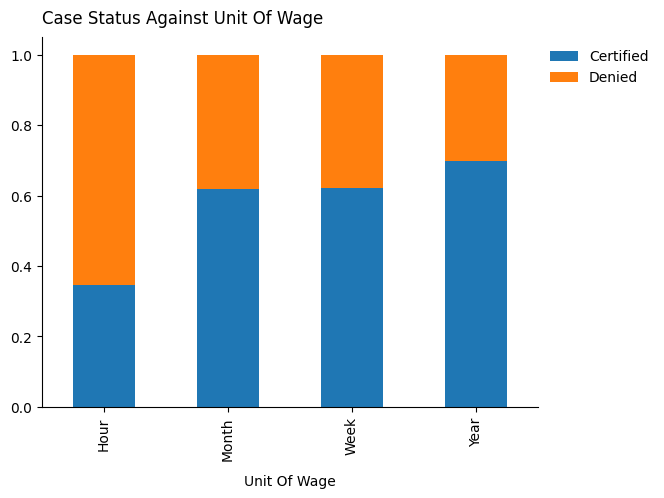

________________________________________________________________________________________________________________________ 



In [26]:
# Create stacked bar plots for the listed categorical attributes
df_list = ['unit_of_wage']
for col in df_list:
    stacked_barplot(df_Visa, 'case_status', col)
    print('_'*120,'\n')

#### Observations:
 * Yearly wage jobs have the highest percentage of certification (~70%)

### 5) The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

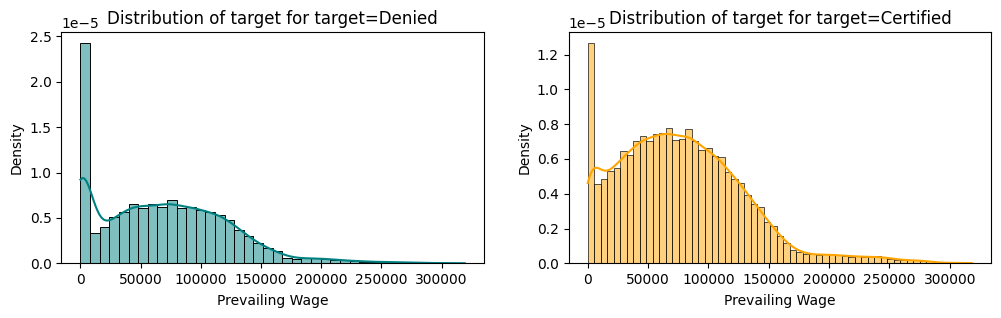

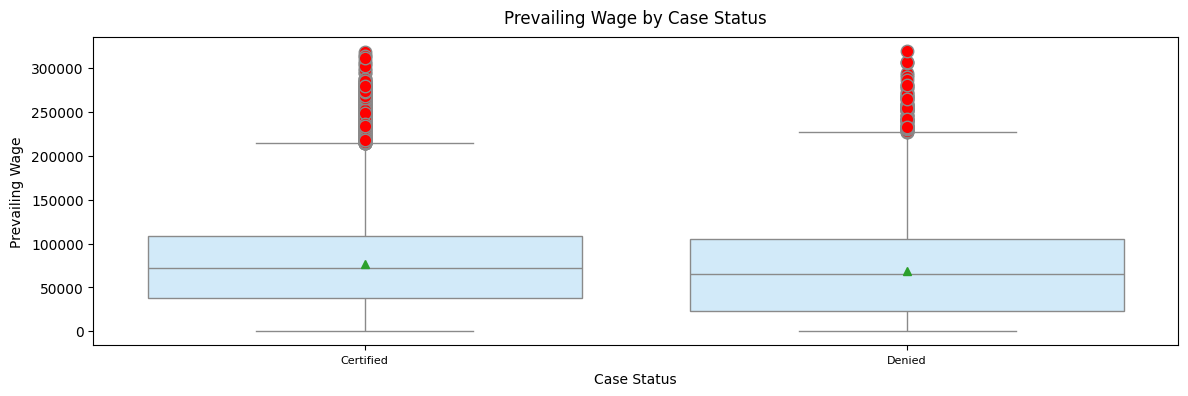

________________________________________________________________________________________________________________________


In [27]:
# Create distribution plots and box plots for the listed numerical attributes by case_status
df_list = ['prevailing_wage']
for col in df_list:
    distplot_by_cat_and_num_att(df_Visa, 'case_status', col)  
    boxplot_by_cat_and_num_att(df_Visa, 'case_status', col)  
    print('_'*120)

#### Observations:
 * Denial of visa occurs more frequently with lower prevailing wages. These are most likely non-yearly wages.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [28]:
# Determine the number of missing values in all the attributes
df_Visa.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### Observations:
* There are no missing values to treat

### Feature Engineering

In [29]:
# Make a copy of the df_Visa dataframe
df_Visa_Copy = df_Visa.copy()

In [30]:
# Change the year establish to become years in business
# Current year is 2016
df_Visa_Copy['years_estab'] = 2016 - df_Visa_Copy['yr_of_estab'] 

In [31]:
# Drop the case_id and yr_of_estab parameters as they will not be used in the model
#df_Visa_Copy = df_Visa_Copy.drop(['case_id','yr_of_estab','unit_of_wage','prevailing_wage'], axis=1)
df_Visa_Copy = df_Visa_Copy.drop(['case_id','yr_of_estab'], axis=1)

In [32]:
df_Visa_Copy.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,years_estab
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,9
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,14
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,8
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,119
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,11


### Outlier Detection

In [33]:
# Create a new numerical column list from the df_Inn_Copy data
df_num_list = [df_Visa_Copy.columns[x] for x in range(len(df_Visa_Copy.columns)) 
               if df_Visa_Copy.dtypes[x] in ('float64', 'int64')]

In [34]:
# Define function to find the outliers of an attribute
def define_outlier(df, col):
    """
    Define the IQR formula and determine which loaded records are for a columns are outliers
    
    df: datafame
    col: column name
    """
    
    # Define the Q1, Q2, and IQR values to determine outlier range
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    
    # Determine if a record is an outlier for either the upper or lower whiskers
    # Assign the records a boolean value 
    BM = (df[col]>(Q3+1.5*IQR)) | (df[col]<(Q1-1.5*IQR))
    
    # Return the dataframe boolean values
    return df[BM]

In [35]:
# Define function to find the outliers in a dataframe
def find_outliers(data):
    """
    Find all the numerical outliers in the dataframe
    
    data = dataframe
    """
    
    # Print the number of rows in the dataframe
    print('Total rows:{}'.format(data.shape[0]))
    print('Number of Outliers:')
    print('-'*45)
    
    # Cycle through the numerical columns in the df_num_list list
    for cols in df_num_list:
        
        # Call the define_outlier function to determine which records for a column are outliers
        # Save the outliers in the df_OM dataframe
        df_OM = define_outlier(data, cols)
        
        # Print the column name, number of outliers, and percent of outliers to the total records
        print('{:<40}: {:<5}   Percent:{}%'.format(
            cols,df_OM[cols].count(), round(df_OM[cols].count()/data.shape[0]*100,1)))

In [36]:
# Call the find_outliers function for the dataframe
find_outliers(df_Visa_Copy)

Total rows:25480
Number of Outliers:
---------------------------------------------
no_of_employees                         : 1556    Percent:6.1%
prevailing_wage                         : 427     Percent:1.7%
years_estab                             : 3260    Percent:12.8%


In [37]:
df_Visa_Copy[df_Visa_Copy['no_of_employees']<=0].head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,years_estab
245,Europe,Master's,N,N,-25,Northeast,39452.99,Year,Y,Certified,36
378,Asia,Bachelor's,N,Y,-11,Northeast,32506.14,Year,Y,Denied,5
832,South America,Master's,Y,N,-17,South,129701.94,Year,Y,Certified,14
2918,Asia,Master's,Y,N,-26,Midwest,112799.46,Year,Y,Certified,11
6439,Asia,Bachelor's,N,N,-14,South,103.97,Hour,Y,Denied,3


In [38]:
# Update the records that had a negative no_of_employee value to the lower whisker value
df_Visa_Copy.loc[df_Visa_Copy['no_of_employees']<=0, 'no_of_employees'] = df_Visa_Copy['no_of_employees'].quantile(0.25)

#### Observations:
 * There are a number of outliers in the dataset
 * Records with a negative no_of_employees were updated to the lower whisker value (1022) 
 * Outliers associated with prevailing wage will be examined with the unit of wage in the next section
 * Other no_of_employees and years_estab will not be treated as they did not appear as errors and the attributes did not appear to impact case status

### Outliers - Bivariate Analysis

In [39]:
# Define function to find the bivariate outliers of an attribute and numerical column
def find_bivariate_outliers(data, att, column):
    """
    Find the outliers associated with an attribute within a dataframe
    
    data: dataframe
    att: attribute to breakout into unique values
    column: column of numerical values to look for outliers
    """
    
    # Look for outliers in numerical column list but have it grouped by each attribute
    
    # Create a list of units
    df_list = data[att].unique().tolist()

    # Print the number of rows in the dataframe
    print('Total rows:{}'.format(data.shape[0]))
    print('Number of Outliers:')
    print('-'*45)

    # Set the total variable to 0
    total = 0
        
    # Cycle through the columns in the df_list list
    for x in df_list:
        # Filter on the dataframe for the attribute (x) rcords
        df =  data[data[att]==x]
          
        # Call the define_outlier function to determine which records for a column are outliers
        # Save the outliers in the df_OM dataframe
        df_OM = define_outlier(df, column)
            
        # Add the number of outlier counts to the total variable
        total += df_OM[column].count()
        
        # Print the column name, number of outliers, and percent of outliers to the total records
        print('{:<21}: {:<5}   Percent:{}%'.format(
                    column,total, round(total/data.shape[0]*100,1)))   

In [40]:
# Create function to update the identified outliers with the lower or upper whisker value
def treat_bivariate_outliers(data, att, column):
    """
    Determine which loaded records for a column are outliers and update them
    to the lower or upper whisker
    
    data: datafame
    att: attribute to breakout into unique values
    column: column of numerical values to look for outliers
    """

        
    # Create a list of unique values for the attribute
    df_list = data[att].unique().tolist()    
    
        
    # Cycle through each item, updating outliers with the lower or upper whisker value
    for x in df_list:
            
        # Define the Q1, Q2, IQR, lower whisker, and upper whisker values to determine outlier range
        Q1 = data.loc[(data[att]==x),(column)].quantile(0.25)  # 25th quantile
        Q3 = data.loc[(data[att]==x),(column)].quantile(0.75)  # 75th quantile
        IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
        lower_whisker = Q1 - 1.5 * IQR
        upper_whisker = Q3 + 1.5 * IQR

        # all the values smaller than lower_whisker will be assigned the value of lower_whisker
        # all the values greater than upper_whisker will be assigned the value of upper_whisker
        # the assignment will be done by using the clip function of NumPy
        data.loc[(data[att]==x),(column)] = np.clip(
                  data.loc[(data[att]==x),(column)],
                  lower_whisker, 
                  upper_whisker)

In [41]:
# Create function to find and treat attribute outliers in a dataframe
def process_bivariate_outliers(data, att, column):
    """
    Find and treat categorical attribute outliers in numerical columns in a dataframe
    
    data: dataframe
    att: attribute to breakout into unique values
    column: column of numerical values to look for outliers
    """
    
    print('Before {} vs {} outliers have been processed'.format(att, column))
    
    # Call the find_bivariate_outliers function for a dataframe and attribute
    find_bivariate_outliers(data, att, column)
    
    # Call the treat_bivariate_outliers function for a dataframe and attribute
    treat_bivariate_outliers(data, att, column)
    
    # Print a line after the graphs to delineate between multiple calls
    print('_'*122)
    
    
    print('After {} vs {} outliers have been processed'.format(att, column))
    
    # Call the find_bivariate_outliers function again for a dataframe and attribute of remaining outliers
    find_bivariate_outliers(data, att, column)
    
    # Print a line after the graphs to delineate between multiple calls
    print('_'*122)
    
    # Create boxplots for column and attribute
    boxplot_by_cat_and_num_att(data, att, column) 

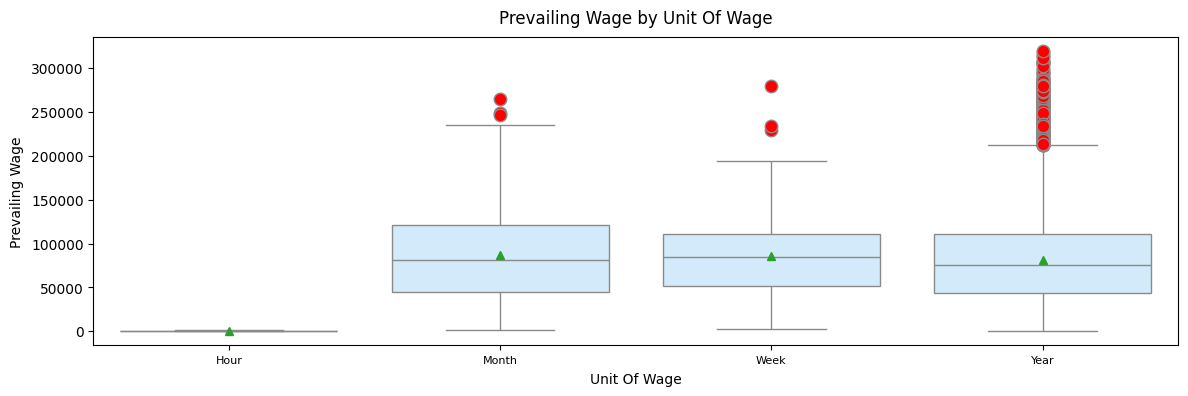

Before unit_of_wage vs prevailing_wage outliers have been processed
Total rows:25480
Number of Outliers:
---------------------------------------------
prevailing_wage      : 0       Percent:0.0%
prevailing_wage      : 473     Percent:1.9%
prevailing_wage      : 476     Percent:1.9%
prevailing_wage      : 479     Percent:1.9%
__________________________________________________________________________________________________________________________
After unit_of_wage vs prevailing_wage outliers have been processed
Total rows:25480
Number of Outliers:
---------------------------------------------
prevailing_wage      : 0       Percent:0.0%
prevailing_wage      : 0       Percent:0.0%
prevailing_wage      : 0       Percent:0.0%
prevailing_wage      : 0       Percent:0.0%
__________________________________________________________________________________________________________________________


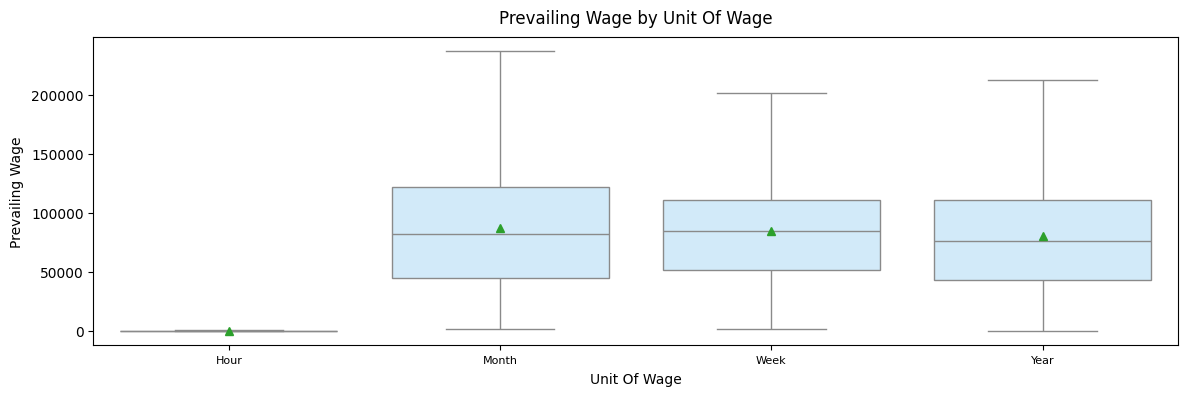

In [42]:
# Create boxplot of prevailing wage by unit of wage
boxplot_by_cat_and_num_att(df_Visa_Copy, 'unit_of_wage', 'prevailing_wage')
    
# Call process_bivariate_outliers to find and process outliers of prevailing wage by unit of wage
process_bivariate_outliers(df_Visa_Copy, 'unit_of_wage','prevailing_wage')    

#### Observations:
 * Outliers associated with prevailing wages by unit of wage has been adjusted to the upper and lower whisker bounds

### Preparing Data For Modeling

In [43]:
# Display first 5 rows
df_Visa_Copy.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,years_estab
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,9
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,14
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,8
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,119
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,11


In [44]:
# Change the Case Status to be a 0 (Denied) or a 1 (Certified) for model building
# Change the full time position to be a 1 (Y) or a 0 (N) for model building
# Change the requires job training to be a 1 (Y) or a 0 (N) for model building
# Change the has job experience to be a 1 (Y) or a 0 (N) for model building
# Change the education of employee to be a number value (1-4)

replaceStructure = {'case_status':{'Denied':0,'Certified':1},
                    'full_time_position' : {'N':0,'Y':1},
                    'requires_job_training' : {'N':0,'Y':1},
                    'has_job_experience' : {'N':0,'Y':1},
                    'education_of_employee' : {'High School':1,
                                               'Bachelor\'s':2,
                                               'Master\'s':3,
                                               'Doctorate':4}        
}

df_Visa_Copy=df_Visa_Copy.replace(replaceStructure)

In [45]:
# list column data types to verify case_status, full_time_position, requires_job_training, education_of_employee
# all had datatypes of int 64 after the change. Note the datatypes that are object for one hot encoding
df_Visa_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  int64  
 2   has_job_experience     25480 non-null  int64  
 3   requires_job_training  25480 non-null  int64  
 4   no_of_employees        25480 non-null  int64  
 5   region_of_employment   25480 non-null  object 
 6   prevailing_wage        25480 non-null  float64
 7   unit_of_wage           25480 non-null  object 
 8   full_time_position     25480 non-null  int64  
 9   case_status            25480 non-null  int64  
 10  years_estab            25480 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 2.1+ MB


## EDA

- It is a good idea to explore the data once again after manipulating it.

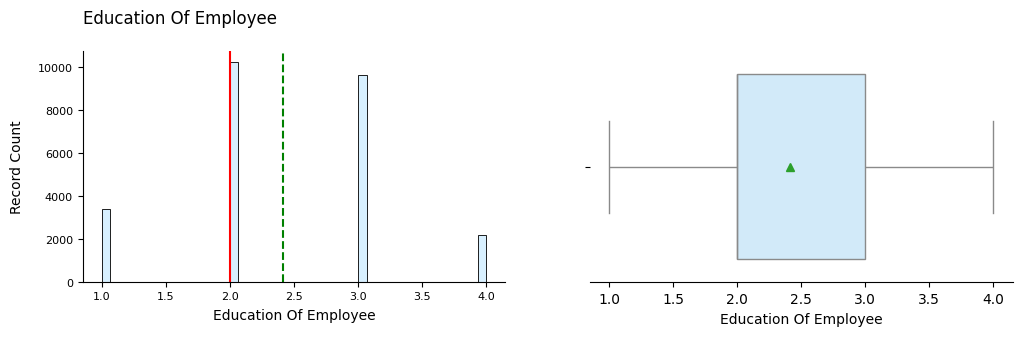

__________________________________________________________________________________________________________________________


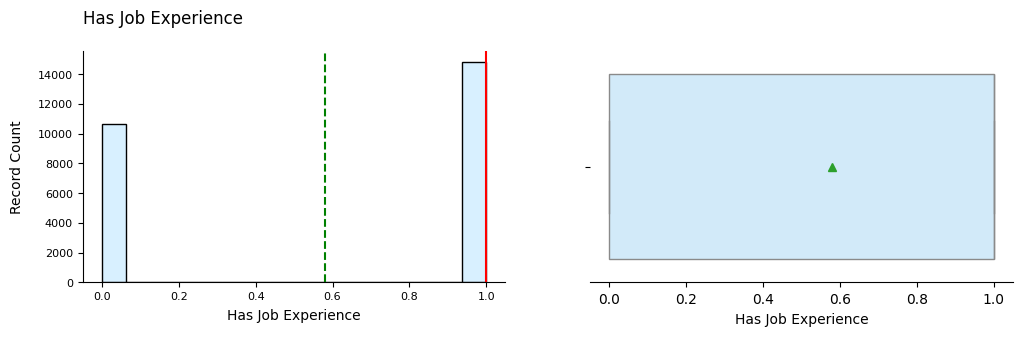

__________________________________________________________________________________________________________________________


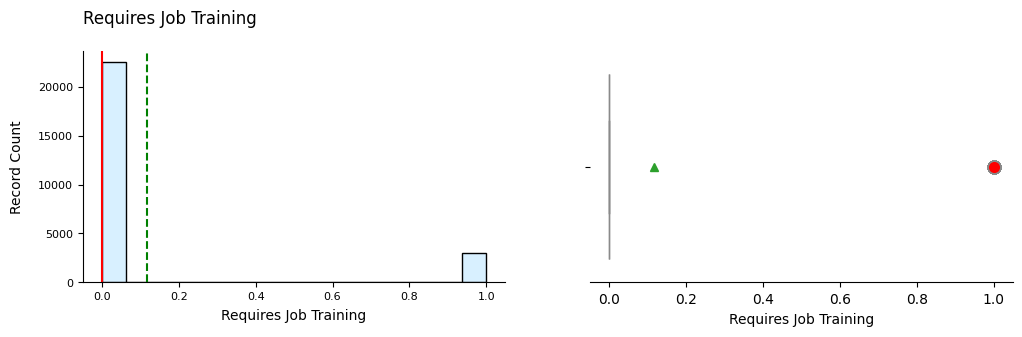

__________________________________________________________________________________________________________________________


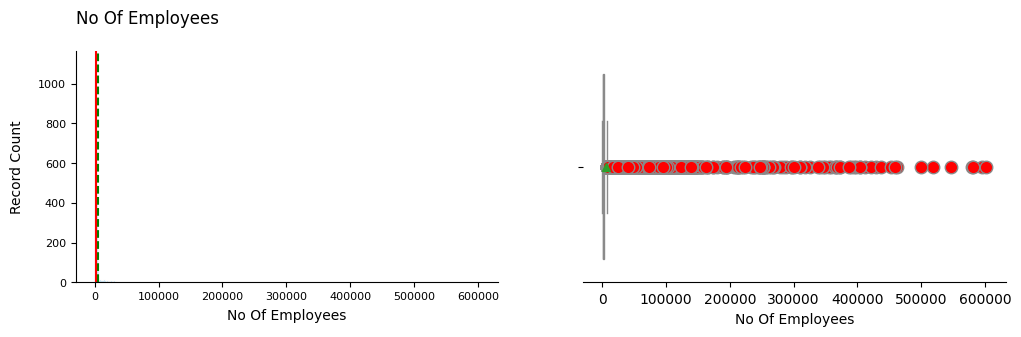

__________________________________________________________________________________________________________________________


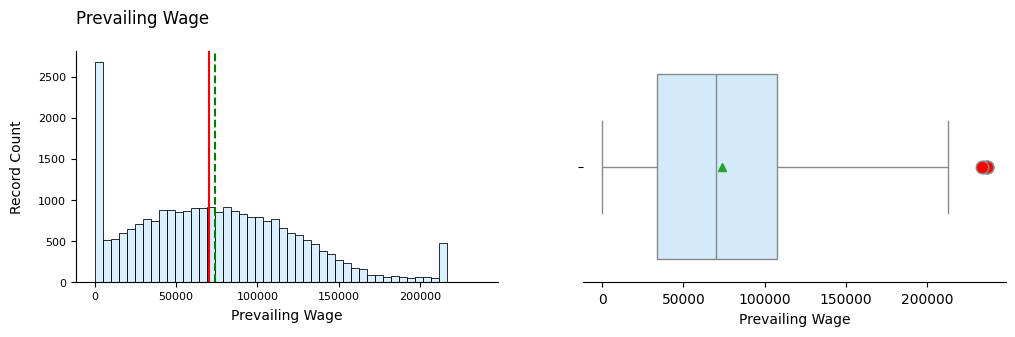

__________________________________________________________________________________________________________________________


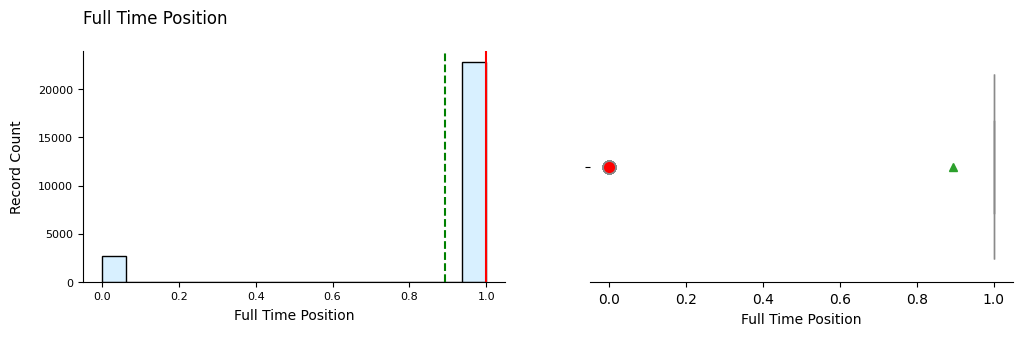

__________________________________________________________________________________________________________________________


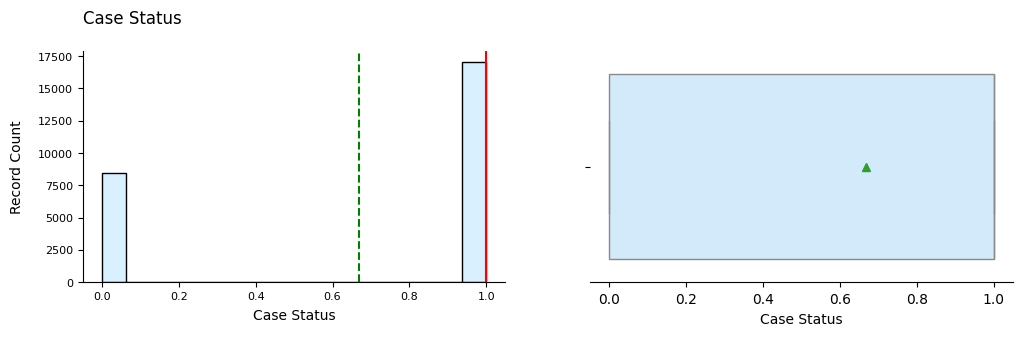

__________________________________________________________________________________________________________________________


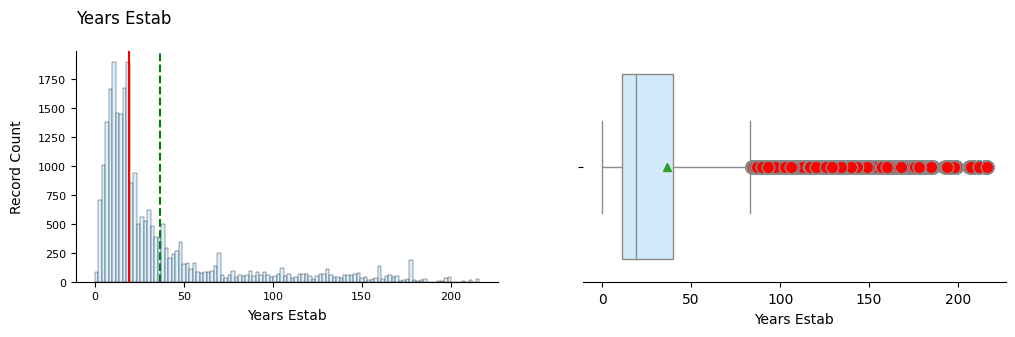

__________________________________________________________________________________________________________________________


In [46]:
# Create histograms and box plots for numerical attributes with many values 

# Create a list of the numerical attributes
df_num_list = [df_Visa_Copy.columns[x] for x in range(len(df_Visa_Copy.columns)) 
               if df_Visa_Copy.dtypes[x] in ('float64', 'int64')]

# Call the hist_box_plot function for each item in the list that has more than 31 values
# 31 was picked due to maximum calendar days in a month
for col in df_num_list:
    hist_box_plots(df_Visa_Copy, col)   

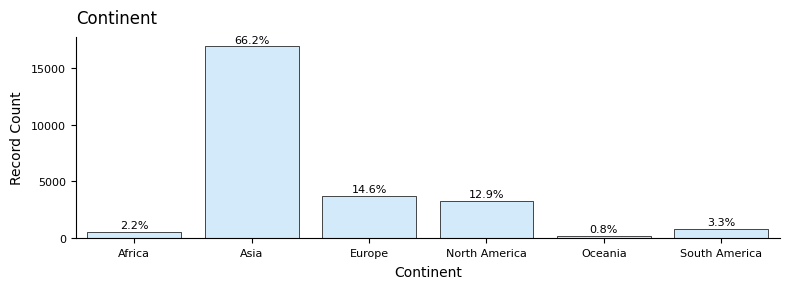

__________________________________________________________________________________________________________________________


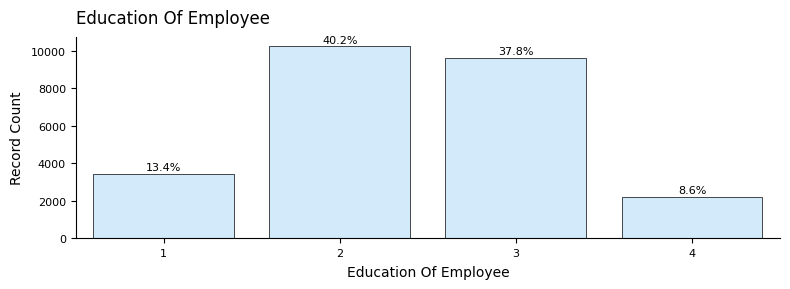

__________________________________________________________________________________________________________________________


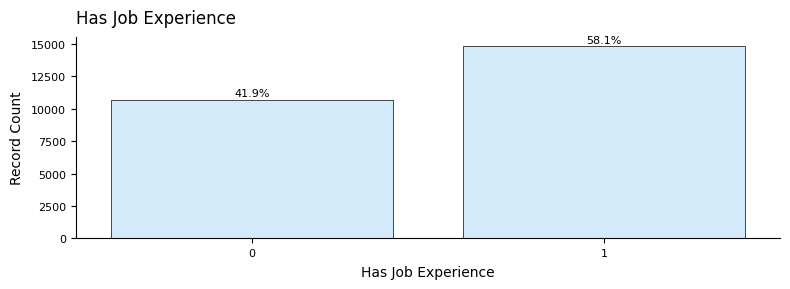

__________________________________________________________________________________________________________________________


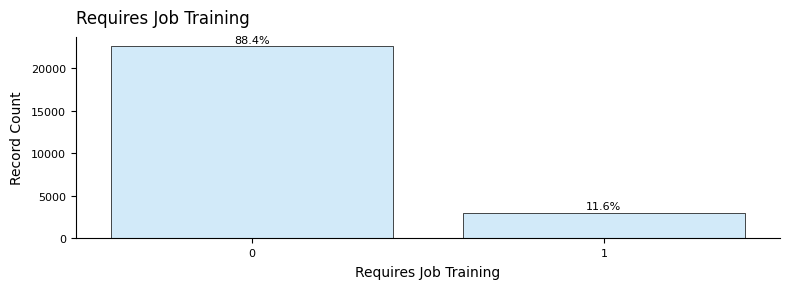

__________________________________________________________________________________________________________________________


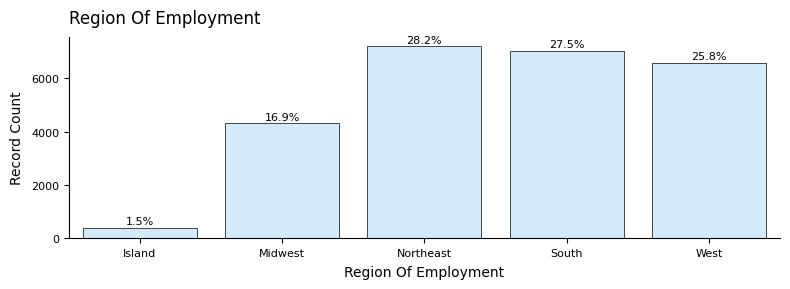

__________________________________________________________________________________________________________________________


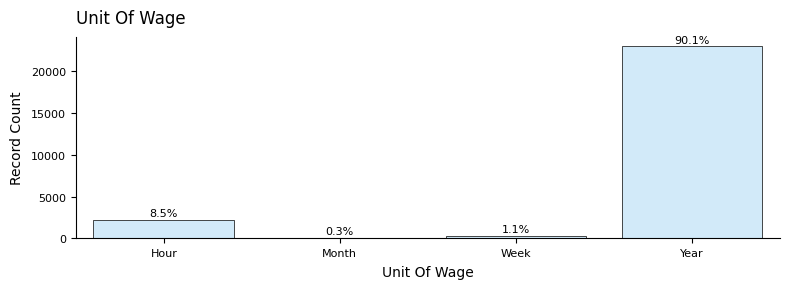

__________________________________________________________________________________________________________________________


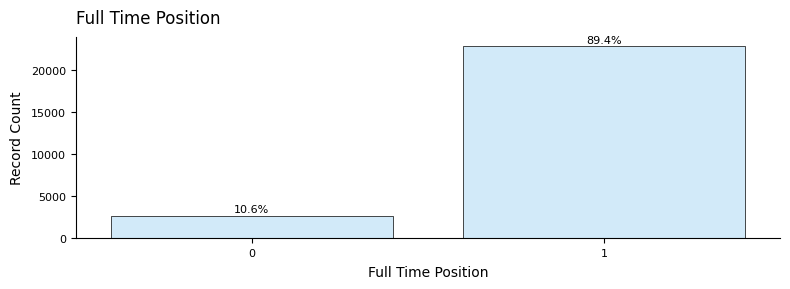

__________________________________________________________________________________________________________________________


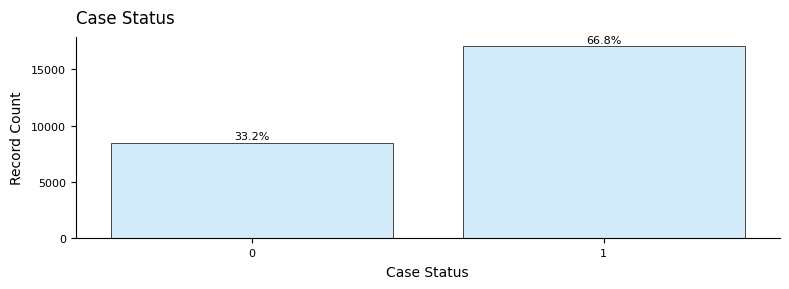

__________________________________________________________________________________________________________________________


In [47]:
# Create bar plots for other attributes
                  
# Create a list of the attributes
df_cat_list = df_Visa_Copy.columns.tolist()                

# Call the bar_plot function for each item in the list
for col in df_cat_list:
    if df_Visa_Copy[col].nunique() <= 32:
        bar_plots(df_Visa_Copy, col)   

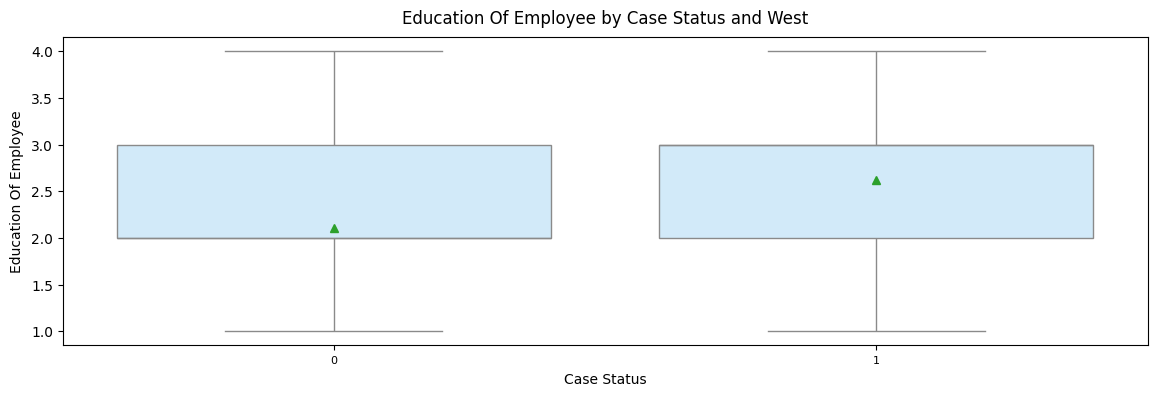

________________________________________________________________________________________________________________________


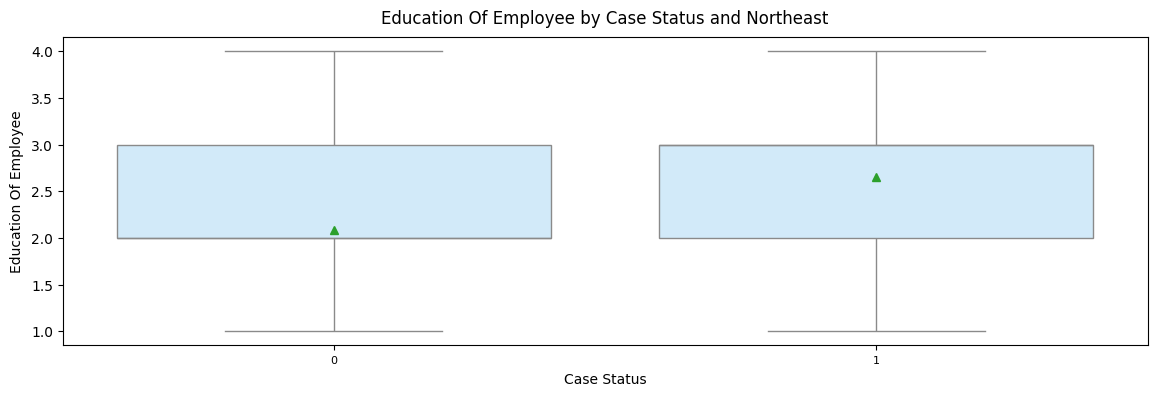

________________________________________________________________________________________________________________________


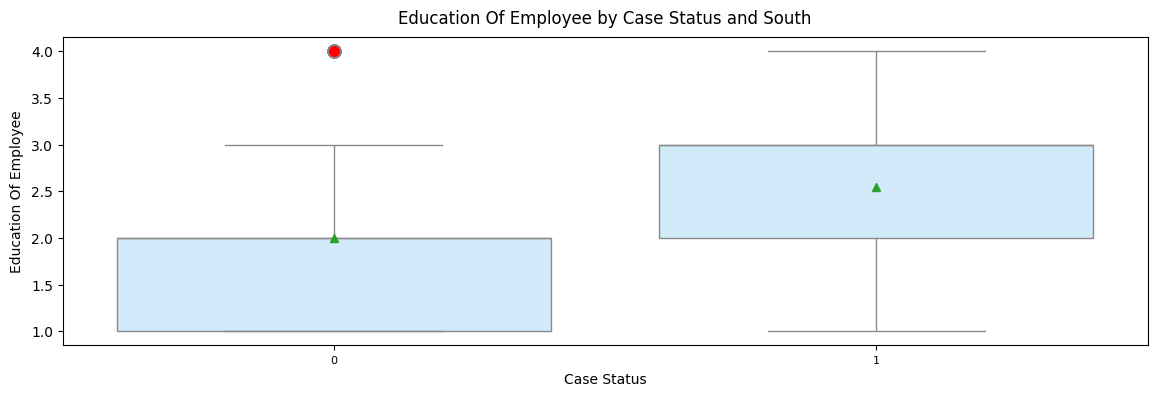

________________________________________________________________________________________________________________________


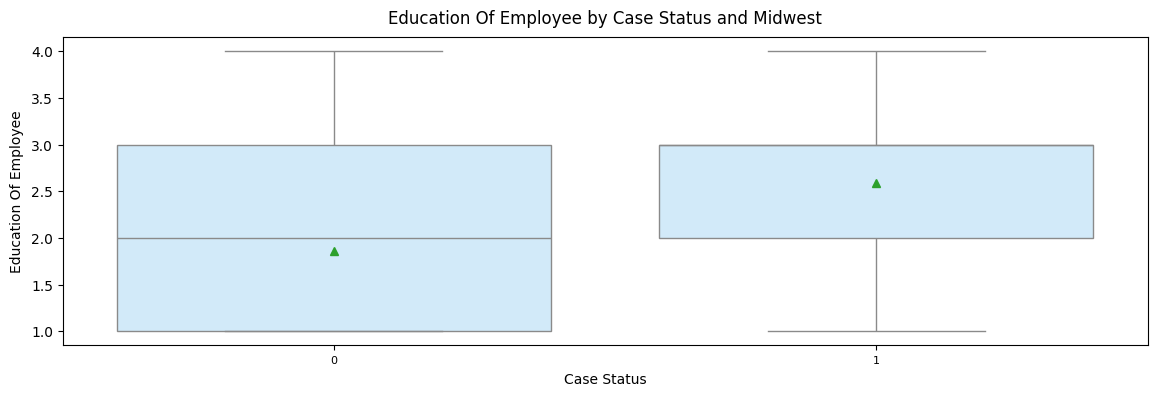

________________________________________________________________________________________________________________________


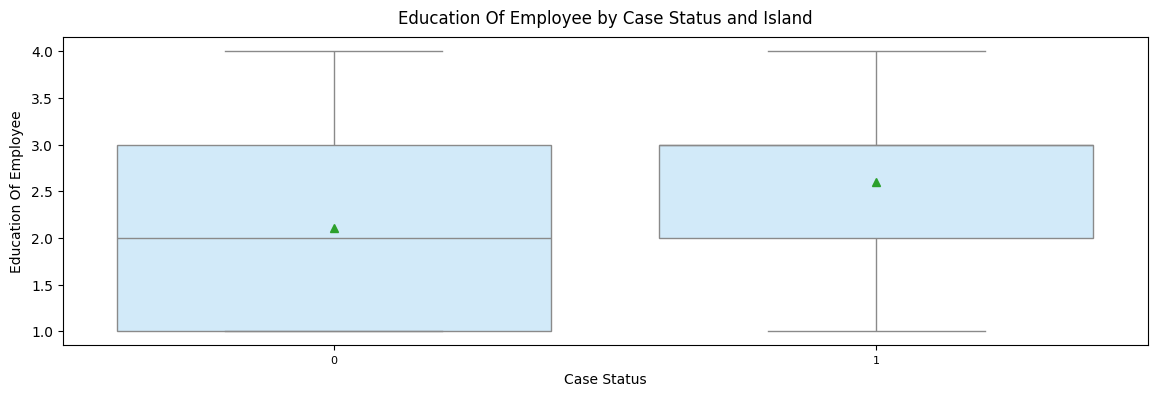

________________________________________________________________________________________________________________________


In [48]:
# Create boxplots for case status by education and region of employment 
df_list = df_Visa_Copy['region_of_employment'].unique()
for col in df_list:
    boxplot_by_cat_and_num_att(df_Visa_Copy[df_Visa_Copy['region_of_employment']==col], 
                               'case_status', 
                               'education_of_employee', subset=col) 
    print('_'*120)    

#### Observations:
 * When an employee had a lower level of education, denial of visa was more prevalent in the Island, Midwest, and South

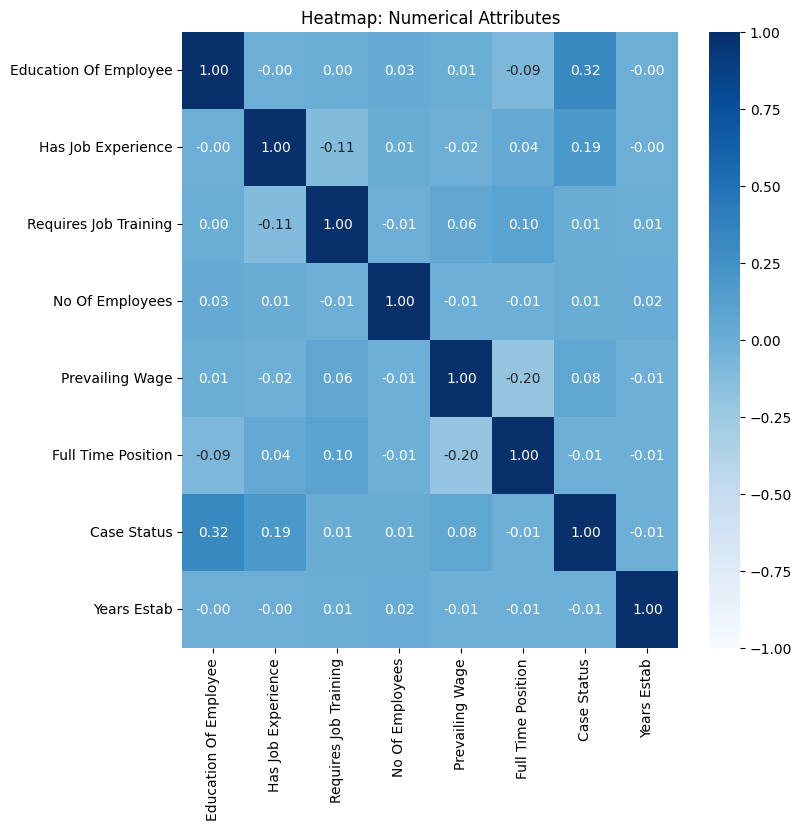

In [49]:
# Create a heatmap of the correlation of the numerical attributes
heatmap_plt(df_Visa_Copy)

#### Observation:
 * There is a moderate level of correlation between the education of an employee and case status
 * There is a moderate level of correlation between job experience and case status
 * There is a moderate level of negative correlation between the prevailing wage and full time position indicator
 * There is a low level of negative correlation between an employee requiring training and their job experience
 * There is a low level of correlation between the full time position indicator and the job requiring training

## Building bagging and boosting models

In [50]:
# Perform one hot encoding on the remaining objects to transform them into columns and numbers
oneHotCols = ['continent','region_of_employment','unit_of_wage']
df_Visa_Copy = pd.get_dummies(df_Visa_Copy, oneHotCols, dtype='int64') 

# Display the first 5 rows for verification purposes
df_Visa_Copy.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,case_status,years_estab,continent_Africa,continent_Asia,...,continent_South America,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,1,0,0,14513,592.2029,1,0,9,0,1,...,0,0,0,0,0,1,1,0,0,0
1,3,1,0,2412,83425.6500,1,1,14,0,1,...,0,0,0,1,0,0,0,0,0,1
2,2,0,1,44444,122996.8600,1,0,8,0,1,...,0,0,0,0,0,1,0,0,0,1
3,2,0,0,98,83434.0300,1,0,119,0,1,...,0,0,0,0,0,1,0,0,0,1
4,3,1,0,1082,149907.3900,1,1,11,1,0,...,0,0,0,0,1,0,0,0,0,1


In [51]:
# List the columns to verify all are now numerical
df_Visa_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   education_of_employee           25480 non-null  int64  
 1   has_job_experience              25480 non-null  int64  
 2   requires_job_training           25480 non-null  int64  
 3   no_of_employees                 25480 non-null  int64  
 4   prevailing_wage                 25480 non-null  float64
 5   full_time_position              25480 non-null  int64  
 6   case_status                     25480 non-null  int64  
 7   years_estab                     25480 non-null  int64  
 8   continent_Africa                25480 non-null  int64  
 9   continent_Asia                  25480 non-null  int64  
 10  continent_Europe                25480 non-null  int64  
 11  continent_North America         25480 non-null  int64  
 12  continent_Oceania               

In [52]:
# Drop all features that have a correlation less than 0.02 to the case status
threshold = 0.02
correlations = df_Visa_Copy.corr()['case_status'].drop(['case_status'])
fs = list(correlations[abs(correlations)>=threshold].index.values)
fs.append('case_status')
df_Visa_Copy =  df_Visa_Copy[fs]

In [53]:
fs

['education_of_employee',
 'has_job_experience',
 'prevailing_wage',
 'continent_Asia',
 'continent_Europe',
 'continent_North America',
 'continent_South America',
 'region_of_employment_Midwest',
 'region_of_employment_Northeast',
 'region_of_employment_South',
 'region_of_employment_West',
 'unit_of_wage_Hour',
 'unit_of_wage_Year',
 'case_status']

### Split the data into train and test sets

In [54]:
# Split the data into the independent feature variables (X) and target variable (y)
X = df_Visa_Copy.drop('case_status', axis=1)
y = df_Visa_Copy.pop('case_status')

In [55]:
# Split the X and y data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1,stratify=y)

In [56]:
# Validate that the data was split properly between training and testing data

print('X_train rows: {}'.format(X_train.shape[0]))
print('X_test rows: {}'.format(X_test.shape[0]))
print('df_Visa case status certified pct: {:.2f}%'
      .format(df_Visa['case_status'].value_counts(normalize=True).sort_values(ascending=False)[0]*100))
print('df_Visa case status denied pct: {:.2f}%'
      .format(df_Visa['case_status'].value_counts(normalize=True).sort_values(ascending=False)[1]*100))
print('y_train case status \'Y\' pct: {:.2f}%'
      .format(y_test.value_counts(normalize=True).sort_values(ascending=False)[1]*100))
print('y_test case status \'N\' pct: {:.2f}%'
      .format(y_test.value_counts(normalize=True).sort_values(ascending=False)[0]*100))

X_train rows: 17836
X_test rows: 7644
df_Visa case status certified pct: 66.79%
df_Visa case status denied pct: 33.21%
y_train case status 'Y' pct: 66.78%
y_test case status 'N' pct: 33.22%


### Create performance metric functions

In [57]:
# Define function to create a confusion matrix of the classification model

def create_confusion_matrix(model, predictors, target, rpt_type):
    """
    To plot the confusion_matrix with percentages

    model: classifier model to predict values
    predictors: independent X variables
    target: dependent Y variable
    rpt_type: to distinguish between training and testing reports
    """
    
    # Predict the y labels (1 or 0) based on the predictor model
    y_pred = model.predict(predictors)
    
    # Build a confusion matrix based on the predicted y values and the actual y values
    cm = metrics.confusion_matrix(target, y_pred)
    
    # Create a dataframe with the confusion matrix that includes labels
    df_cm = pd.DataFrame(cm, index = [i for i in ['Actual - No','Actual - Yes']],
                         columns = [i for i in ['Predicted - No','Predicted - Yes']])
    
    # Retrieve the cell percentage and total values of the matrix
    labels = np.asarray([["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
                          for item in cm.flatten()]
                        ).reshape(2, 2)

    # Create a heatmap of the matrix including the cell total and percentage labels
    plt.figure(figsize=(6, 4))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.title('Confusion Matrix: {}'.format(rpt_type))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [58]:
#  Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 Score
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the models
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the models
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the models
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #F1 score of the models
    train_f1 = metrics.f1_score(y_train,pred_train) 
    test_f1 = metrics.f1_score(y_test,pred_test) 
    
    score_list.extend((train_acc,test_acc,
                       train_recall,test_recall,
                       train_precision,test_precision,
                       train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print('Accuracy on training set : {:.2f}%'.format(train_acc*100))
        print('Accuracy on test set : {:.2f}%'.format(test_acc*100))
        print('Recall on training set : {:.2f}%'.format(train_recall*100))
        print('Recall on test set : {:.2f}%'.format(test_recall*100))
        print('Precision on training set : {:.2f}%'.format(train_precision*100))
        print('Precision on test set : {:.2f}%'.format(test_precision*100))
        print('F1 score on training set : {:.2f}%'.format(train_f1*100))
        print('F1 score on test set : {:.2f}%'.format(test_f1*100))
        
    
    return score_list # returning the list with train and test scores

### Decision Tree: Default

In [59]:
# Create decision tree model
decision_tree_default = DecisionTreeClassifier(random_state=1)

# Train the decision tree model
decision_tree_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [60]:
# Evaluate the model
decision_tree_default_score = get_metrics_score(decision_tree_default)

Accuracy on training set : 99.69%
Accuracy on test set : 65.59%
Recall on training set : 99.84%
Recall on test set : 74.28%
Precision on training set : 99.70%
Precision on test set : 74.22%
F1 score on training set : 99.77%
F1 score on test set : 74.25%


#### Observations:
 * The decision tree model using default parameters appears to have high overfitting based on the large variances 
   between the training and test scores
 * The F1 score is 74%

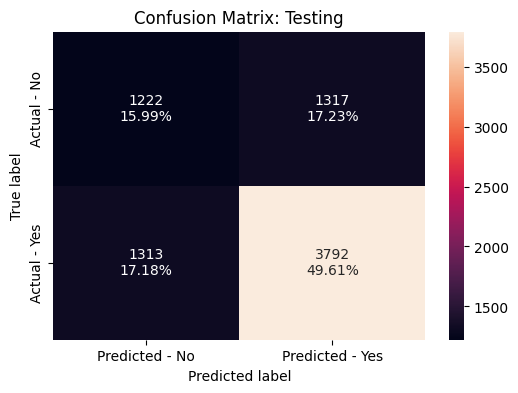

In [61]:
# Create the confusion matrix
create_confusion_matrix(decision_tree_default,X_test, y_test, 'Testing')

#### Observations:
 * The model can correctly predict a high number of actual Visa approvals
 * The model struggles to correctly predict denials 

### Bagging Classifier: Default

In [62]:
# Create the ensemble default bagging classifier
bagging_default = BaggingClassifier(random_state=1)

# Train the ensemble
bagging_default.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [63]:
# Evaluate the model
bagging_default_score = get_metrics_score(bagging_default)

Accuracy on training set : 96.96%
Accuracy on test set : 66.67%
Recall on training set : 97.15%
Recall on test set : 74.79%
Precision on training set : 98.28%
Precision on test set : 75.17%
F1 score on training set : 97.71%
F1 score on test set : 74.98%


#### Observations:
 * The bagging model using default parameters appears to have high overfitting based on the large variances between the
   training and test scores
 *  * The F1 score is ~75%

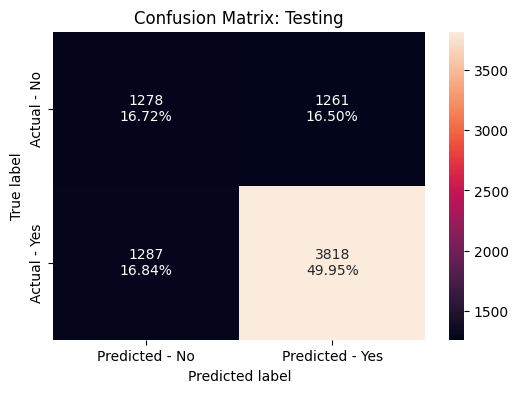

In [64]:
# Create the confusion matrix
create_confusion_matrix(bagging_default,X_test, y_test, 'Testing')

#### Observations:
 * The model can correctly predict a high number of actual Visa approvals
 * The model struggles to correctly predict denials but is better than 50%

### Random Forest Classifier: Default

In [65]:
# Create the ensemble default random forest classifier
random_forest_default = RandomForestClassifier(random_state=1)

# Train the ensemble
random_forest_default.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [66]:
# Evaluate the model
random_forest_default_score = get_metrics_score(random_forest_default)

Accuracy on training set : 99.66%
Accuracy on test set : 66.17%
Recall on training set : 99.84%
Recall on test set : 75.30%
Precision on training set : 99.65%
Precision on test set : 74.37%
F1 score on training set : 99.74%
F1 score on test set : 74.83%


#### Observations:
 * The random forest model using default parameters appears to have high overfitting based on the large variances 
   between the training and test scores
 * The F1 score is ~75%

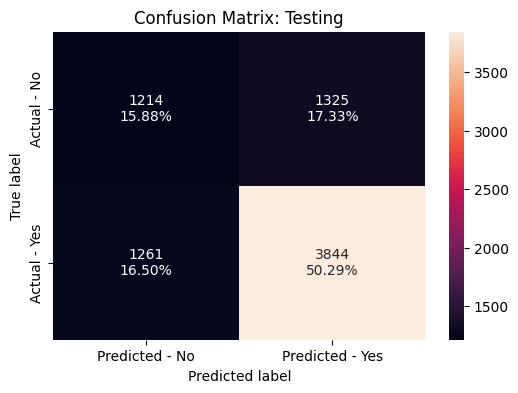

In [67]:
# Create the confusion matrix
create_confusion_matrix(random_forest_default,X_test, y_test, 'Testing')

#### Observations:
 * The model can correctly predict a high number of actual Visa approvals
 * The model struggles to correctly predict denials at a prediction rate less than 50%

## Hyperparameter tuning

### Decision Tree: Tuning

In [68]:
# Build the decision tree model
decision_tree_tuned = DecisionTreeClassifier(random_state=1)

# Add grid parameters
# The ranges were removed to speed up reprocessing times 
parameters = {
    'criterion': ['gini'],
    'max_depth': [6],
    'min_samples_leaf': [3],
    'max_leaf_nodes' : [20],
    'min_impurity_decrease': [0.001],
    'class_weight': [{0:0.67, 1:0.33}]
}

# Use F1 scoring to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(decision_tree_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
decision_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
decision_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=6,
                       max_leaf_nodes=20, min_impurity_decrease=0.001,
                       min_samples_leaf=3, random_state=1)

In [69]:
# Evaluate the model
decision_tree_tuned_score = get_metrics_score(decision_tree_tuned)

Accuracy on training set : 72.72%
Accuracy on test set : 72.15%
Recall on training set : 76.61%
Recall on test set : 76.71%
Precision on training set : 81.45%
Precision on test set : 80.64%
F1 score on training set : 78.95%
F1 score on test set : 78.63%


#### Observations:
 * The tuned decision tree is no longer suffering from overfitting
 * The model is able to correctly predict ~72% of cases
 * The F1 score is ~79%

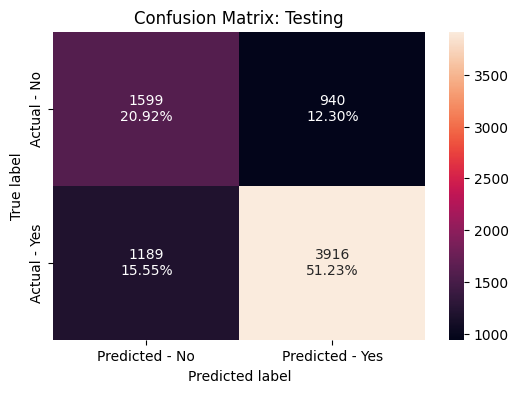

In [70]:
# Create the confusion matrix
create_confusion_matrix(decision_tree_tuned,X_test, y_test, 'Testing')

#### Observations:
 * The model can correctly predict a high number of actual Visa approvals
 * The model has improved predicting denials from the default decision tree model

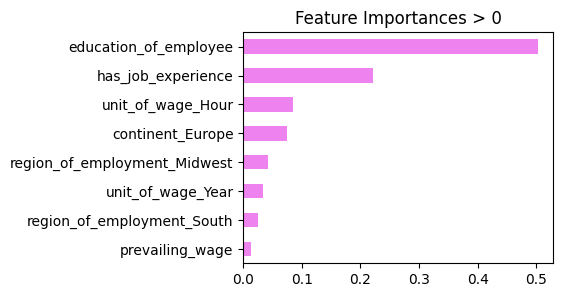

In [71]:
# Plot the Gini importance features that are greater than 0
df = pd.Series(decision_tree_tuned.feature_importances_, index=X_train.columns)
df = df[df>0].sort_values(ascending=True)
plt.figure(figsize=(4,3))
plt.title('Feature Importances > 0')
plt.xlabel('Relative Importance')
df.plot(kind='barh',color='violet', align='center')
plt.show()

#### Observations:
 * Education and job experience have the most influence in determining Visa certification
 * People from Europe, hourly wage, and working in the Midwest also influenced Visa certification

### Bagging Classifier: Tuning

In [72]:
# Build the bagging model
bagging_tuned = BaggingClassifier(random_state=1)

# Add grid parameters
# The ranges were removed to speed up reprocessing times 
parameters = {
    'max_samples': [0.2],
    'max_features': [7],
    'n_estimators' : [30]
}

# Use precision scoring to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=7, max_samples=0.2, n_estimators=30,
                  random_state=1)

In [73]:
# Evaluate the model
bagging_tuned_score=get_metrics_score(bagging_tuned)

Accuracy on training set : 77.79%
Accuracy on test set : 72.67%
Recall on training set : 94.54%
Recall on test set : 92.20%
Precision on training set : 77.28%
Precision on test set : 73.57%
F1 score on training set : 85.05%
F1 score on test set : 81.84%


#### Observations:
 * The tuned bagging classifier is no longer suffering from overfitting
 * The model is able to correctly predict ~73% of cases
 * The F1 score is ~82%

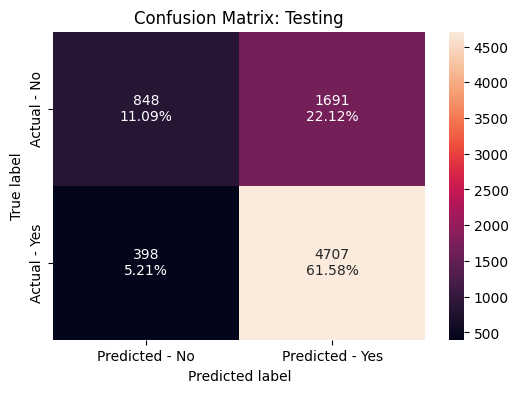

In [74]:
# Create the confusion matrix
create_confusion_matrix(bagging_tuned,X_test, y_test, 'Testing')

#### Observations:
 * The model can correctly predict a high number of actual Visa approvals
 * The model struggles more to correctly predict denials 

### Random Forest Classifier: Tuning

In [75]:
# Build the random forest model
random_forest_tuned = RandomForestClassifier(random_state=1)

# Add grid parameters
# The ranges were removed to speed up reprocessing times 
parameters = {
    'n_estimators': [190],
    'max_features': [7],
    'max_samples': [0.1],
    'class_weight': [{0:0.67, 1:0.33}]
}
    
# Use precision scoring to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(random_forest_tuned, parameters, scoring=acc_scorer,cv=5, n_jobs=4)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
random_forest_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
random_forest_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, max_features=7,
                       max_samples=0.1, n_estimators=190, random_state=1)

In [76]:
# Evaluate the model
random_forest_tuned_score=get_metrics_score(random_forest_tuned)

Accuracy on training set : 78.13%
Accuracy on test set : 73.86%
Recall on training set : 89.10%
Recall on test set : 86.41%
Precision on training set : 80.31%
Precision on test set : 77.18%
F1 score on training set : 84.48%
F1 score on test set : 81.53%


#### Observations:
 * The tuned bagging classifier is no longer suffering from high overfitting
 * The model is able to correctly predict ~74% of cases
 * The F1 score is ~82%

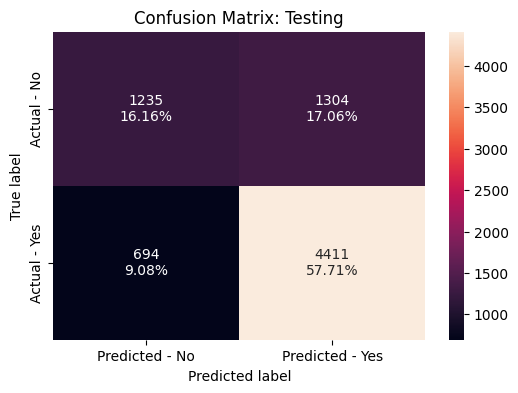

In [77]:
# Create the confusion matrix
create_confusion_matrix(random_forest_tuned,X_test, y_test, 'Testing')

#### Observations:
 * The model can correctly predict a high number of actual Visa approvals
 * The model continues to struggle to correctly predict denials 

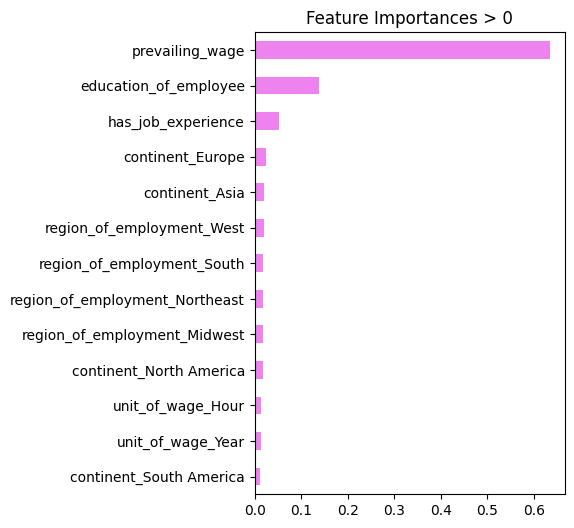

In [78]:
# Plot the Gini importance features that are greater than 0
df = pd.Series(random_forest_tuned.feature_importances_, index=X_train.columns)
df = df[df>0].sort_values(ascending=True)
plt.figure(figsize=(4,6))
plt.title('Feature Importances > 0')
plt.xlabel('Relative Importance')
df.plot(kind='barh',color='violet', align='center')
plt.show()

#### Observations:
 * Prevailing wage, employee education, and job experience have the most influence in
   determining Visa certification

### AdaBoost Classifier: Default

In [79]:
# Create the ensemble default AdaBoost classifier
abc_default = AdaBoostClassifier(random_state=1)

# Train the ensemble
abc_default.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [80]:
# Evaluate the model
abc_default_score=get_metrics_score(abc_default)

Accuracy on training set : 73.65%
Accuracy on test set : 73.43%
Recall on training set : 88.68%
Recall on test set : 88.64%
Precision on training set : 75.92%
Precision on test set : 75.72%
F1 score on training set : 81.80%
F1 score on test set : 81.67%


#### Observations:
 * The default AdaBoost classifier is not suffering from overfitting
 * The model is able to correctly predict ~73% of cases
 * The F1 score is ~82%

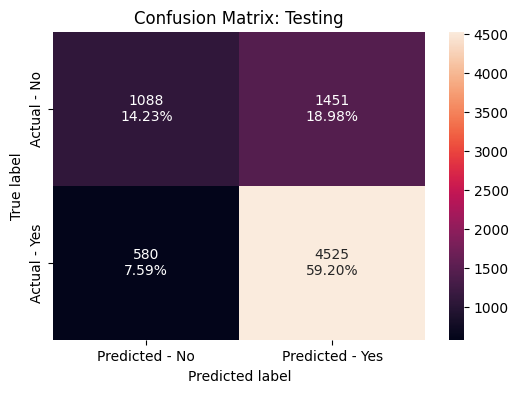

In [81]:
# Create the confusion matrix
create_confusion_matrix(abc_default,X_test, y_test, 'Testing')

#### Observations:
 * The model can correctly predict a high number of actual Visa approvals
 * The model struggles to correctly predict denials 

### Gradient Boosting Classifier: Default

In [82]:
# Create the ensemble default gradient boosting classifier
gbc_default = GradientBoostingClassifier(random_state=1)

# Train the ensemble
gbc_default.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [83]:
# Evaluate the model
gbc_default_score=get_metrics_score(gbc_default)

Accuracy on training set : 75.49%
Accuracy on test set : 74.78%
Recall on training set : 87.61%
Recall on test set : 87.38%
Precision on training set : 78.29%
Precision on test set : 77.65%
F1 score on training set : 82.69%
F1 score on test set : 82.23%


#### Observations:
 * The default gradient classifier is not suffering from overfitting
 * The model is able to correctly predict ~75% of cases
 * The F1 score is 82%

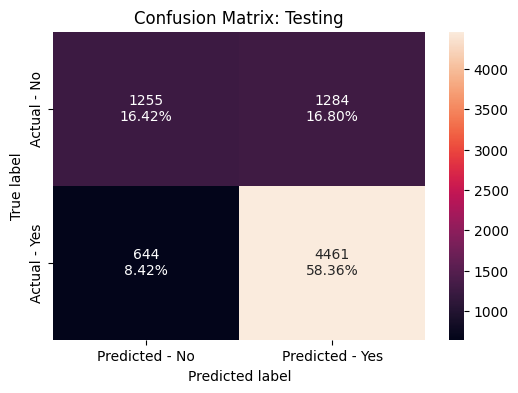

In [84]:
# Create the confusion matrix
create_confusion_matrix(gbc_default,X_test, y_test, 'Testing')

#### Observations:
 * The model can correctly predict a high number of actual Visa approvals
 * The model struggles to correctly predict denials 

### XGBoost Classifier: Default

In [85]:
# Create the ensemble default xgboosting classifier
xgb_default = XGBClassifier(random_state=1,eval_metric='logloss')

# Train the model
xgb_default.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [86]:
# Evaluate the model
xgb_default_score=get_metrics_score(xgb_default)

Accuracy on training set : 79.39%
Accuracy on test set : 72.83%
Recall on training set : 89.73%
Recall on test set : 85.27%
Precision on training set : 81.34%
Precision on test set : 76.66%
F1 score on training set : 85.33%
F1 score on test set : 80.74%


#### Observations:
 * The default xgboosting classifier is suffering from slight overfitting
 * The model is able to correctly predict ~73% of cases
 * The F1 score is ~81%

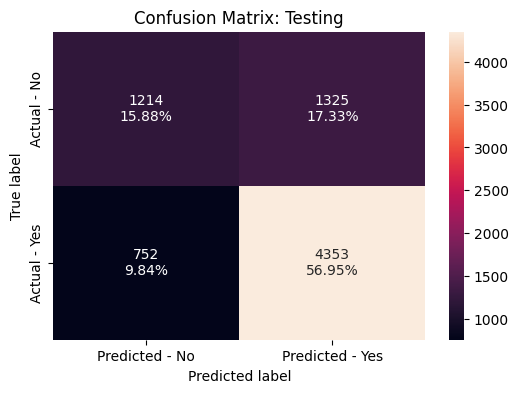

In [87]:
# Create the confusion matrix
create_confusion_matrix(xgb_default,X_test, y_test, 'Testing')

#### Observations:
 * The model can correctly predict a high number of actual Visa approvals
 * The model struggles to correctly predict denials 

### AdaBoost Classifier: Tuned

In [88]:
# Build the adaboost model
abc_tuned = AdaBoostClassifier(random_state=1)


# Add grid parameters
# The ranges were removed to speed up reprocessing times 
parameters = {
    "n_estimators": [110],
    "learning_rate": [0.04],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=4),
    ],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.04, n_estimators=110, random_state=1)

In [89]:
# Evaluate the model
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set : 75.77%
Accuracy on test set : 74.61%
Recall on training set : 87.92%
Recall on test set : 87.33%
Precision on training set : 78.42%
Precision on test set : 77.50%
F1 score on training set : 82.90%
F1 score on test set : 82.12%


#### Observations:
 * The tuned AdaBoost classifier is not suffering from overfitting
 * The model is able to correctly predict ~75% of cases
 * The F1 score is ~82%

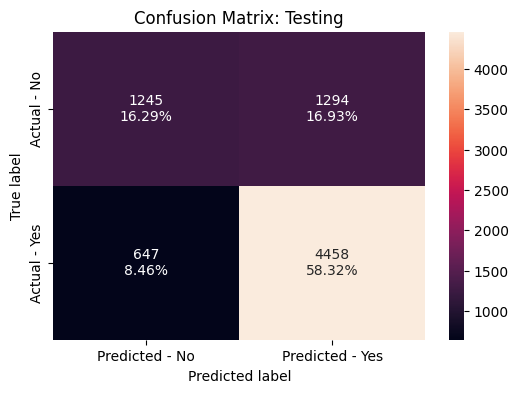

In [90]:
# Create the confusion matrix
create_confusion_matrix(abc_tuned,X_test, y_test, 'Testing')

#### Observations:
 * The model can correctly predict a high number of actual Visa approvals
 * The model continues to struggle to correctly predict denials, but it predicts more denials correctly than the AdaBoost default model 

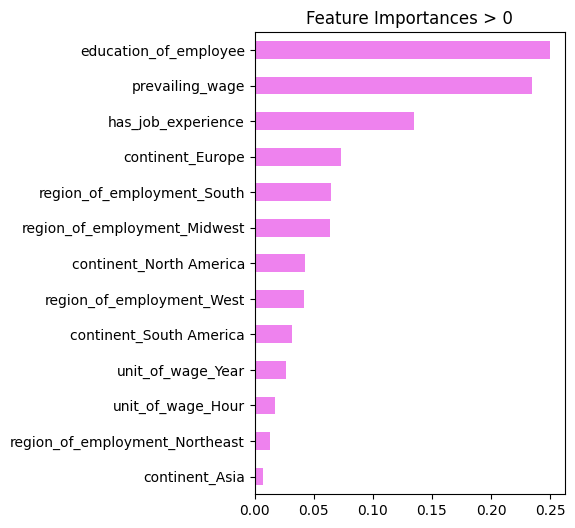

In [91]:
# Plot the Gini importance features that are greater than 0
df = pd.Series(abc_tuned.feature_importances_, index=X_train.columns)
df = df[df>0].sort_values(ascending=True)
plt.figure(figsize=(4,6))
plt.title('Feature Importances > 0')
plt.xlabel('Relative Importance')
df.plot(kind='barh',color='violet', align='center')
plt.show()

#### Observations:
 * Employee education, prevailing wage, job experience, employees from Europe have the most influence in determining Visa certification

### Gradient Boosting Classifier: Tuning

In [92]:
# Build the gradient model 
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Add grid parameters
# The ranges were removed to speed up reprocessing times 
parameters = {
    'n_estimators': [45],
    'learning_rate': [0.2],
    'subsample': [0.8],
    'max_features': [0.7],
    'max_depth' : [3]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.7, n_estimators=45,
                           random_state=1, subsample=0.8)

In [93]:
# Evaluate the model
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set : 75.28%
Accuracy on test set : 74.87%
Recall on training set : 87.49%
Recall on test set : 87.38%
Precision on training set : 78.12%
Precision on test set : 77.74%
F1 score on training set : 82.54%
F1 score on test set : 82.28%


#### Observations:
 * The default xgboosting classifier is not suffering from overfitting
 * The model is able to correctly predict ~74% of cases
 * The F1 score is 82%

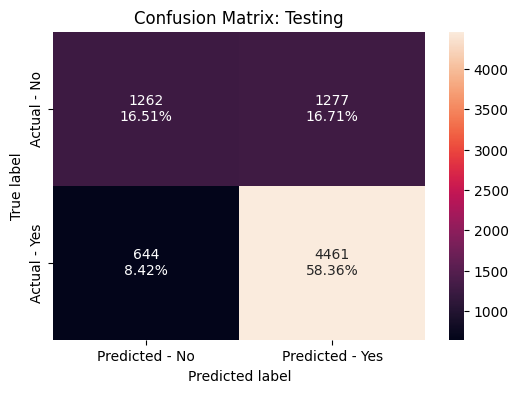

In [94]:
# Create the confusion matrix
create_confusion_matrix(gbc_tuned,X_test, y_test, 'Testing')

#### Observations:
 * The model did not vary much from the Gradient default model
 * The model can correctly predict a high number of actual Visa approvals
 * The model continues to struggle to correctly predict denials 

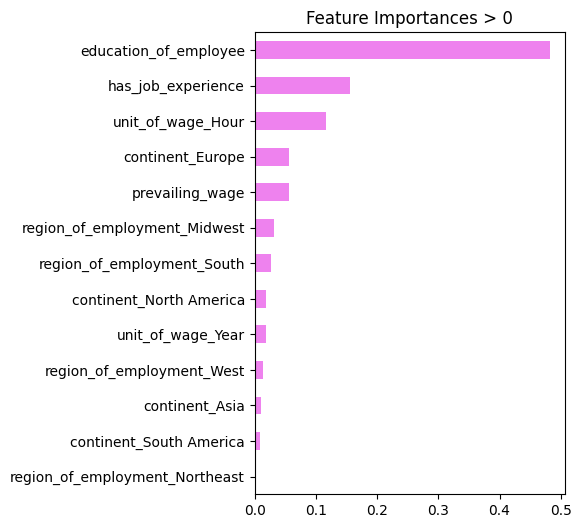

In [95]:
# Plot the Gini importance features that are greater than 0
df = pd.Series(gbc_tuned.feature_importances_, index=X_train.columns)
df = df[df>0].sort_values(ascending=True)
plt.figure(figsize=(4,6))
plt.title('Feature Importances > 0')
plt.xlabel('Relative Importance')
df.plot(kind='barh',color='violet', align='center')
plt.show()

#### Observations:
 * Employee education, job experience, and hourly employees have the most influence in determining Visa certification

### XGBoost Classifier: Tuned

In [96]:
# Build the xgboost model 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Add the grid parameters
# The ranges were mostly removed to speed up reprocessing times 
parameters = {'n_estimators':np.arange(80,100,5),
     'scale_pos_weight':[1],
     'learning_rate': [0.025],
     'gamma':[3],
     'subsample':[0.75],
     'colsample_bytree' : [0.8],
     'colsample_bylevel' : [0.65]         
}
    
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.65, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.025, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=95,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [97]:
# Display all the parameters for the xgboost model
params = xgb_tuned.get_params()
print(params)

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': 0.65, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': 3, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.025, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 95, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 1, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 1, 'subsample': 0.75, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [98]:
# Evaluate the model
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set : 75.21%
Accuracy on test set : 74.79%
Recall on training set : 87.78%
Recall on test set : 87.72%
Precision on training set : 77.90%
Precision on test set : 77.50%
F1 score on training set : 82.55%
F1 score on test set : 82.29%


#### Observations:
 * The default xgboosting classifier is notsuffering from overfitting
 * The model is able to correctly predict ~75% of cases
 * The F1 score is ~82%

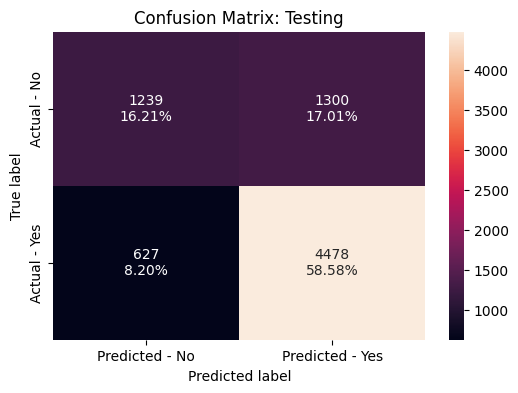

In [99]:
# Create the confusion matrix
create_confusion_matrix(xgb_tuned,X_test, y_test, 'Testing')

#### Observations:
 * The model can correctly predict a high number of actual Visa approvals
 * The model continues to struggle to correctly predict denials 

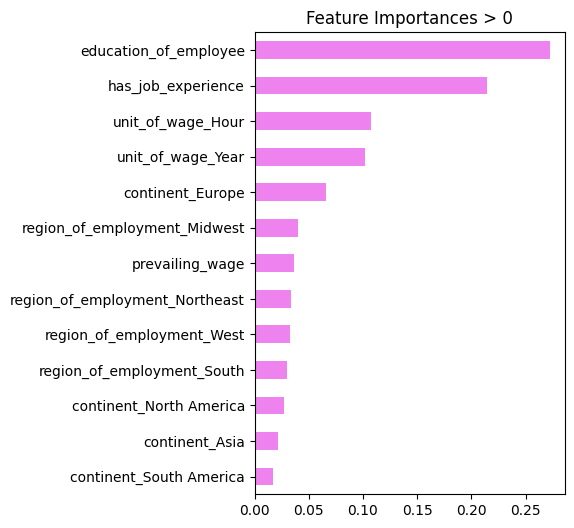

In [100]:
# Plot the Gini importance features that are greater than 0
df = pd.Series(xgb_tuned.feature_importances_, index=X_train.columns)
df = df[df>0].sort_values(ascending=True)
plt.figure(figsize=(4,6))
plt.title('Feature Importances > 0')
plt.xlabel('Relative Importance')
df.plot(kind='barh',color='violet', align='center')
plt.show()

#### Observations:
 * Employee education, job experience, hourly employees,  yearly salaried employees, and employees from Europe
   have the most influence in determining Visa certification

### Stacking Model

In [101]:
from sklearn.linear_model import LogisticRegression

# Determine the previously create tuned models to choose for the stacking model
estimators=[
            #('Decision Tree', decision_tree_default),
            ('Decision Tree', decision_tree_tuned),
            #('Bagging Tree', bagging_tuned),
            #('Random Forest Tree', random_forest_tuned),
            #('Adaboost', abc_tuned),
            ('Gradient Boosting', gbc_tuned),
            ('XGBoosting', xgb_tuned)
]

# Use logistic regression as the final estimator model
final_estimator=LogisticRegression(random_state=1)

In [102]:
# Create the stacking classifier
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)

# Train the stacking model
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.67,
                                                                     1: 0.33},
                                                       max_depth=6,
                                                       max_leaf_nodes=20,
                                                       min_impurity_decrease=0.001,
                                                       min_samples_leaf=3,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(learning_rate=0.2,
                                                           max_features=0.7,
                                                           n_estimators=45,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('XGBoosting',
                                XGBClassi...
                                              interaction_constraints=None,
                                              learning_rate=0.025, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=95, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=1, ...))],
                   final_estimator=LogisticRegression(random_state=1))

In [103]:
# Evaluate the model
stacking_estimator_score=get_metrics_score(stacking_estimator)

Accuracy on training set : 75.33%
Accuracy on test set : 74.86%
Recall on training set : 87.38%
Recall on test set : 87.31%
Precision on training set : 78.23%
Precision on test set : 77.77%
F1 score on training set : 82.55%
F1 score on test set : 82.26%


#### Observations:
 * The default xgboosting classifier is not suffering from overfitting
 * The model is able to correctly predict ~74% of cases
 * The F1 score is 82%

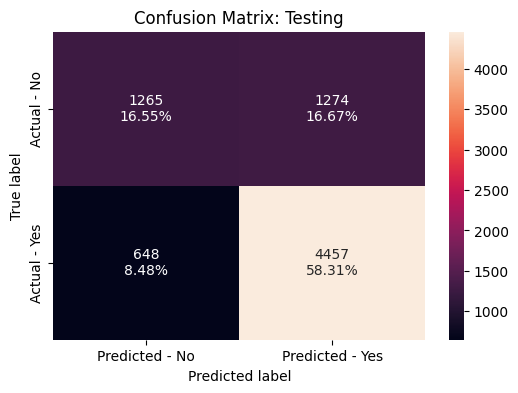

In [104]:
# Create the confusion matrix
create_confusion_matrix(stacking_estimator,X_test, y_test, 'Testing')

#### Observations:
 * The model can correctly predict a high number of actual Visa approvals
 * The model struggles to correctly predict denials 

## Model Performance Comparison and Conclusions

In [105]:
# Create the dataframe of the scores of each model
models = pd.DataFrame([decision_tree_default_score, decision_tree_tuned_score,
          bagging_default_score, bagging_tuned_score,
          random_forest_default_score, random_forest_tuned_score,
          abc_default_score, abc_tuned_score,
          gbc_default_score, gbc_tuned_score, 
          xgb_default_score, xgb_tuned_score,
          stacking_estimator_score             
                      ])

# Insert the column 'Model' in the first position
models.insert(0,'Model','')

# Add the model names to the rows of the Model column
models['Model'] = ['Decision Tree', 'Decision Tree Tuned',
                   'Bagging', 'Bagging Tuned',
                   'Random Forest', 'Random Forest Tuned',
                   'AdaBoost Default', 'AdaBoost Tuned',
                   'Gradient Boosting Default','Gradient Boosting Tuned',
                   'XGBoost Default','XGBoost Tuned',
                   'Stacking Estimator']

# Change the names of the other columns to correspond to the scores
models.rename(columns={0:'Accuracy Training',
                       1:'Accuracy Testing',
                       2:'Recall Training',
                       3:'Recall Testing',
                       4:'Precision Training',
                       5:'Precision Testing',
                       6:'F1 Score Training',
                       7:'F1 Score Testing'
                      },inplace=True)
    
    

In [106]:
# Display the model dataframe
models

,Model,Accuracy Training,Accuracy Testing,Recall Training,Recall Testing,Precision Training,Precision Testing,F1 Score Training,F1 Score Testing
0,Decision Tree,0.996916,0.655939,0.998405,0.742801,0.996982,0.742220,0.997693,0.742510
1,Decision Tree Tuned,0.727181,0.721481,0.766054,0.767091,0.814458,0.806425,0.789515,0.786266
2,Bagging,0.969612,0.666667,0.971544,0.747894,0.982763,0.751723,0.977121,0.749804
3,Bagging Tuned,0.777921,0.726714,0.945438,0.922037,0.772815,0.735699,0.850455,0.818395
4,Random Forest,0.996580,0.661695,0.998405,0.752987,0.996481,0.743664,0.997442,0.748297
5,Random Forest Tuned,0.781285,0.738619,0.890959,0.864055,0.803117,0.771829,0.844761,0.815342
6,AdaBoost Default,0.736488,0.734301,0.886762,0.886386,0.759181,0.757195,0.818027,0.816713
7,AdaBoost Tuned,0.757681,0.746075,0.879208,0.873262,0.784158,0.775035,0.828967,0.821221
8,Gradient Boosting Default,0.754934,0.747776,0.876102,0.873849,0.782853,0.776501,0.826857,0.822304
9,Gradient Boosting Tuned,0.752803,0.748692,0.874927,0.873849,0.781217,0.777449,0.825421,0.822835


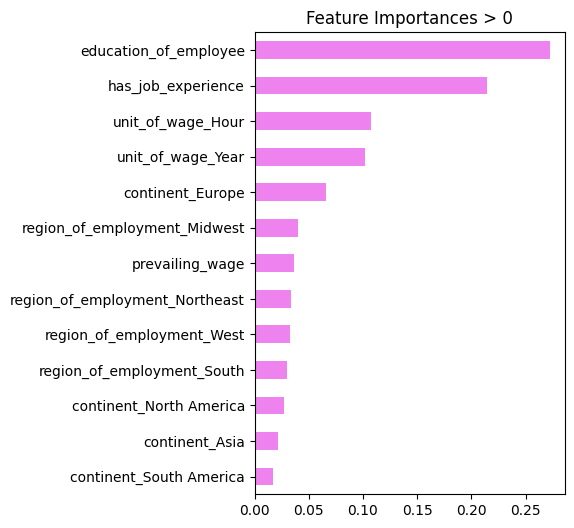

In [107]:
# Plot the Gini importance features that are greater than 0
df = pd.Series(xgb_tuned.feature_importances_, index=X_train.columns)
df = df[df>0].sort_values(ascending=True)
plt.figure(figsize=(4,6))
plt.title('Feature Importances > 0')
plt.xlabel('Relative Importance')
df.plot(kind='barh',color='violet', align='center')
plt.show()

#### Observations:
 * Employee education, job experience, hourly employees,  yearly salaried employees, and employees from Europe
   have the most influence in determining Visa certification

## Actionable Insights and Recommendations

#### Model Determination:
 * The F1 score was used to evaluate models to find a model that had the highest predictive performance value
 * The various models are strong in accurately predicting approvals
 * However, the models struggle to accurately predict denials
 * The model with the highest F1 score and best predictive performance of certifications and denials was the
   tuned XGBoost model

#### Model influencers:
 * The XGBoost model had the following variables that heavily influenced the predictions:
      * Education of employee - the higher the education level, the higher percentage level of certifications
      * Job experience - applicants with job experience had a higher percentage level of certifications
      * Hourly wage classification - applicants listed with an hourly wage had the least percentage level of certifications
      * Yearly wage classification - applicants listed with a yearly wage had the highest percentage level of certifications

#### Recommendations:
 * Applicants who are predicted to be approved should be shortlisted for review
 * Modify resources to examine a higher precentage shortlisted applications than those whose Visa is predicted to be denied
 * Examine personnel to determine who could be more efficient in processing probable approval or denial applications
 * Investigate other possible data points that could be used to improve classifications. Denials were not 
   well predicted in the models 

#### Actions:

 * Document the reason(s) why a denial occurred for use in prediction of applicant's certification
 * Include the application type (H-1B1, H-2B) and occupation code of applicant in the analysis 
 * Store the prediction value with the case id to continue evaluating the model chosen
 * Determine a standardized method to determine an hourly wage

#### Other Insights:
 * The rate of certification was 66% 
 * The South and Midwest had a higher denial rate than other regions which could be related to a more conservative
   population
 * 66% of applicants originated from Asia
 * Only 13% of employees had a high school degree, of which 66% were denied
 * 58% of applicants had job experience, of which 74% were certified
 * Applicants without job experience were certified 56% of the time
 * 90% of applicants had a yearly wage listed with a 70% certification rate 
 * About 8% of applicants had an hourly wage, of which 65% were denied
 * 79% of applicants from Europe were certified
 * 42% of applicants from South America were denied